----------------------------------------------------------------------------------------------------------------------
# Telecom-Churn Case Study

### Problem Statement: 
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, the goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.
    
----------------------------------------------------------------------------------------------------------------------

In [1]:
# Importing packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
import statsmodels.api as smt
from statsmodels.stats.outliers_influence import variance_inflation_factor

----------------------------------------------------------------------------------------------------------------------
### Step 1: Data profiling (EDA)
          - 1. Load Data
          - 2. Understanding the data and Distinguish Attributes
          - 3. Data cleaning
          - 4. Univariate Analysis
          - 5. Bivariate Analysis
          - 6. Multi-variate Analysis
          - 7. Feature Engineering
          - 8. Collect Insight

##### 1. Load data

In [2]:
#Read train and test data
data_train = pd.read_csv("train (1).csv")
data_train.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [3]:
data_train.shape

(69999, 172)

In [4]:
data_test = pd.read_csv("test (1).csv")
data_test.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

##### 2. Understanding the data 

In [5]:
data_test.shape

(30000, 171)

#### 2.1 Check the datatype of the variables

In [6]:
#### 2.3 Check the datatype of the variablesdata_train.select_dtypes(include=['object']).info()

In [7]:
data_train.select_dtypes(include=['number']).info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 163 columns):
 #    Column              Dtype  
---   ------              -----  
 0    id                  int64  
 1    circle_id           int64  
 2    loc_og_t2o_mou      float64
 3    std_og_t2o_mou      float64
 4    loc_ic_t2o_mou      float64
 5    arpu_6              float64
 6    arpu_7              float64
 7    arpu_8              float64
 8    onnet_mou_6         float64
 9    onnet_mou_7         float64
 10   onnet_mou_8         float64
 11   offnet_mou_6        float64
 12   offnet_mou_7        float64
 13   offnet_mou_8        float64
 14   roam_ic_mou_6       float64
 15   roam_ic_mou_7       float64
 16   roam_ic_mou_8       float64
 17   roam_og_mou_6       float64
 18   roam_og_mou_7       float64
 19   roam_og_mou_8       float64
 20   loc_og_t2t_mou_6    float64
 21   loc_og_t2t_mou_7    float64
 22   loc_og_t2t_mou_8    float64
 23   loc_og_t2m_mou_6    float64
 24   

#### 2.2. Get the basic statistical information

In [8]:
data_train.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

#### Observation:
   - There are missing values that needs to imputed
   - There are many columns with just one variance and after checking the correlation matrix we can drop them.
   - This is only to understand the basic statistical data and as you know as per Anscombe’s quartet,
     we need to visualize the data before we can infer and not just rely on statistical data.

#### 2.4 Handle missing values

In [9]:
#### 2.4 Handle missing values#EDA process

#Checking Percentage of null|na values in column
(((data_train.isnull() | data_train.isna()).sum() * 100) / data_train.index.size).loc[lambda x : x>0].sort_values(ascending=False)

max_rech_data_6             74.902499
fb_user_6                   74.902499
date_of_last_rech_data_6    74.902499
av_rech_amt_data_6          74.902499
night_pck_user_6            74.902499
count_rech_2g_6             74.902499
total_rech_data_6           74.902499
arpu_2g_6                   74.902499
count_rech_3g_6             74.902499
arpu_3g_6                   74.902499
arpu_3g_7                   74.478207
count_rech_2g_7             74.478207
av_rech_amt_data_7          74.478207
max_rech_data_7             74.478207
total_rech_data_7           74.478207
arpu_2g_7                   74.478207
date_of_last_rech_data_7    74.478207
night_pck_user_7            74.478207
fb_user_7                   74.478207
count_rech_3g_7             74.478207
total_rech_data_8           73.689624
max_rech_data_8             73.689624
date_of_last_rech_data_8    73.689624
count_rech_2g_8             73.689624
fb_user_8                   73.689624
arpu_3g_8                   73.689624
count_rech_3

In [10]:
#Checking data in columns having null values
for i in data_train.columns:
    print(i,data_train[i].unique())

id [    0     1     2 ... 69996 69997 69998]
circle_id [109]
loc_og_t2o_mou [ 0. nan]
std_og_t2o_mou [ 0. nan]
loc_ic_t2o_mou [ 0. nan]
last_date_of_month_6 ['6/30/2014']
last_date_of_month_7 ['7/31/2014' nan]
last_date_of_month_8 ['8/31/2014' nan]
arpu_6 [ 31.277   0.     60.806 ... 372.088 238.575 168.269]
arpu_7 [ 87.009 122.787 103.176 ... 258.374 245.414  42.815]
arpu_8 [  7.527  42.953   0.    ... 279.782 145.062 167.961]
onnet_mou_6 [ 48.58   0.     0.53 ... 486.49 399.01 116.54]
onnet_mou_7 [124.38   0.    15.93 ... 453.83 378.21 283.63]
onnet_mou_8 [  1.29   0.     6.13 ... 458.79 380.99 232.63]
offnet_mou_6 [ 32.24   0.    53.99 ... 617.98 360.88 575.46]
offnet_mou_7 [ 96.68  25.99  82.05 ... 772.53 645.89 236.61]
offnet_mou_8 [  2.33  30.89   0.   ...  79.16 783.66 263.84]
roam_ic_mou_6 [  0.    53.64  28.26 ... 221.03  48.39 377.24]
roam_ic_mou_7 [  0.    11.31   7.23 ...  64.53 189.64  37.41]
roam_ic_mou_8 [  0.    47.81   3.46 ... 199.44  51.84 506.26]
roam_og_mou_6 [  0.

std_ic_t2o_mou_8 [ 0. nan]
std_ic_mou_6 [  7.46   0.    29.91 ...  88.29 202.28 197.01]
std_ic_mou_7 [ 27.58   0.     2.48 ... 471.88 166.54 108.26]
std_ic_mou_8 [ 15.18   0.     6.38 ... 189.21 595.53 138.86]
total_ic_mou_6 [ 11.84   3.44 124.29 ... 343.16 578.68 542.18]
total_ic_mou_7 [  53.04   39.44   33.83 ... 1645.94  518.64  399.33]
total_ic_mou_8 [ 40.56  25.04  36.64 ... 131.11   7.55 414.54]
spl_ic_mou_6 [0.000e+00 4.400e-01 2.600e-01 3.500e-01 1.300e-01       nan 1.900e-01
 5.000e-02 2.800e-01 1.500e-01 3.400e-01 2.500e-01 6.000e-02 1.000e-01
 1.600e-01 4.500e-01 2.400e-01 6.000e-01 3.300e-01 2.000e-01 4.300e-01
 5.400e-01 3.800e-01 3.900e-01 4.900e-01 3.600e-01 3.000e-01 8.000e-02
 1.100e-01 4.000e-01 6.900e-01 2.300e-01 1.400e-01 6.400e-01 2.100e-01
 1.800e-01 4.100e-01 4.600e-01 1.000e-02 7.500e-01 5.800e-01 5.300e-01
 3.100e-01 6.300e-01 5.600e-01 6.100e-01 4.800e-01 7.300e-01 8.400e-01
 5.100e-01 7.100e-01 3.000e-02 6.800e-01 5.900e-01 8.600e-01 9.000e-02
 8.100e-01 2.9

av_rech_amt_data_7 [       nan 1.4500e+02 1.9100e+02 1.9800e+02 4.6000e+01 3.0400e+02
 2.5000e+01 1.5400e+02 5.0000e+01 2.1000e+02 3.9600e+02 3.4000e+01
 2.5200e+02 1.5000e+02 1.0200e+02 2.2100e+02 1.7000e+01 3.0800e+02
 3.1000e+01 3.0000e+02 1.3400e+02 1.9600e+02 1.4200e+02 5.0400e+02
 1.8900e+02 2.1500e+02 7.5000e+01 1.1500e+02 3.4200e+02 1.6800e+02
 4.0400e+02 7.5600e+02 4.4900e+02 1.1000e+02 5.2000e+01 1.2500e+02
 9.3900e+02 3.2900e+02 1.5100e+02 9.8000e+01 4.0600e+02 5.5600e+02
 1.0000e+02 4.1900e+02 1.0600e+02 5.2000e+02 9.2000e+01 2.4800e+02
 1.6100e+02 1.4000e+01 4.5800e+02 2.7900e+02 2.0400e+02 7.3000e+02
 2.2300e+02 1.4400e+02 1.6500e+02 4.5500e+02 3.3000e+01 8.5500e+02
 1.7600e+02 1.4900e+02 5.6000e+01 4.0200e+02 6.4000e+01 2.1100e+02
 1.9900e+02 8.9800e+02 3.4500e+02 1.0100e+02 2.4600e+02 6.8000e+01
 2.1800e+02 2.8700e+02 1.9200e+02 1.7900e+02 2.7400e+02 1.0300e+02
 5.8000e+01 3.9800e+02 2.5400e+02 8.5000e+01 2.3000e+01 4.0000e+00
 3.4400e+02 2.2500e+02 2.8000e+01 2.2900e+0

aon [1958  710  882 ... 3330 3491 2913]
aug_vbc_3g [  0.    82.26   1.05 ... 107.77  72.25 664.25]
jul_vbc_3g [0.00000e+00 7.35600e+01 8.60000e-01 ... 1.12700e+02 1.65300e+01
 1.40296e+03]
jun_vbc_3g [  0.   177.14  18.95 ... 148.8   18.84 990.97]
churn_probability [0 1]


In [11]:
print(data_train.id.duplicated().sum()) #checking if any duplicate rows based on id column

0


#### 3 - Cleaning the data:

In [12]:
#Dropping columns which has all values 0
drop_0_columns = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6',
                  'std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6',
                 'std_ic_t2o_mou_7','std_ic_t2o_mou_8']
data_train.drop(drop_0_columns,axis=1,inplace = True)
data_test.drop(drop_0_columns,axis=1,inplace = True)

In [13]:
#fill 0 to nan value
fill_0_columns = data_train.select_dtypes(include=['number']).columns
data_train[fill_0_columns] = data_train[fill_0_columns].fillna(0)

In [14]:
fill_0_columns = data_test.select_dtypes(include=['number']).columns

data_test[fill_0_columns] = data_test[fill_0_columns].fillna(0)

In [15]:
#Checking unique vlaues for object columns
for i in data_train.select_dtypes(include=['object']).columns:
    print(i,data_train[i].unique())

last_date_of_month_6 ['6/30/2014']
last_date_of_month_7 ['7/31/2014' nan]
last_date_of_month_8 ['8/31/2014' nan]
date_of_last_rech_6 ['6/22/2014' '6/12/2014' '6/11/2014' '6/15/2014' '6/25/2014' '6/30/2014'
 '6/29/2014' '6/20/2014' '6/28/2014' '6/27/2014' '6/26/2014' '6/19/2014'
 '6/23/2014' '6/24/2014' '6/14/2014' nan '6/5/2014' '6/8/2014' '6/6/2014'
 '6/16/2014' '6/13/2014' '6/18/2014' '6/21/2014' '6/17/2014' '6/10/2014'
 '6/7/2014' '6/2/2014' '6/1/2014' '6/3/2014' '6/9/2014' '6/4/2014']
date_of_last_rech_7 ['7/10/2014' '7/22/2014' '7/21/2014' '7/26/2014' '7/27/2014' '7/19/2014'
 '7/30/2014' '7/16/2014' '7/31/2014' '7/20/2014' '7/25/2014' '7/29/2014'
 '7/28/2014' nan '7/7/2014' '7/18/2014' '7/13/2014' '7/17/2014'
 '7/12/2014' '7/24/2014' '7/15/2014' '7/1/2014' '7/23/2014' '7/9/2014'
 '7/8/2014' '7/14/2014' '7/5/2014' '7/4/2014' '7/11/2014' '7/6/2014'
 '7/2/2014' '7/3/2014']
date_of_last_rech_8 ['8/24/2014' '8/26/2014' '8/25/2014' '8/30/2014' '8/28/2014' '8/19/2014'
 '8/5/2014' '8/27/2

In [16]:
#Updating object columns with default values
data_train['last_date_of_month_7'] = data_train['last_date_of_month_7'].fillna('7/31/2014')
data_train['last_date_of_month_8'] = data_train['last_date_of_month_8'].fillna('8/31/2014')
data_train['date_of_last_rech_6'] = data_train['date_of_last_rech_6'].fillna('6/30/2014')
data_train['date_of_last_rech_7'] = data_train['date_of_last_rech_7'].fillna('7/31/2014')
data_train['date_of_last_rech_8'] = data_train['date_of_last_rech_8'].fillna('8/31/2014')
data_train['date_of_last_rech_data_6'] = data_train['date_of_last_rech_data_6'].fillna('6/30/2014')
data_train['date_of_last_rech_data_7'] = data_train['date_of_last_rech_data_7'].fillna('7/31/2014')
data_train['date_of_last_rech_data_8'] = data_train['date_of_last_rech_data_8'].fillna('8/31/2014')

data_test['last_date_of_month_7'] = data_test['last_date_of_month_7'].fillna('7/31/2014')
data_test['last_date_of_month_8'] = data_test['last_date_of_month_8'].fillna('8/31/2014')
data_test['date_of_last_rech_6'] = data_test['date_of_last_rech_6'].fillna('6/30/2014')
data_test['date_of_last_rech_7'] = data_test['date_of_last_rech_7'].fillna('7/31/2014')
data_test['date_of_last_rech_8'] = data_test['date_of_last_rech_8'].fillna('8/31/2014')
data_test['date_of_last_rech_data_6'] = data_test['date_of_last_rech_data_6'].fillna('6/30/2014')
data_test['date_of_last_rech_data_7'] = data_test['date_of_last_rech_data_7'].fillna('7/31/2014')
data_test['date_of_last_rech_data_8'] = data_test['date_of_last_rech_data_8'].fillna('8/31/2014')

In [17]:
#dropping 2 columns since thier data is not significant and all are unique values
data_train.drop(['circle_id'],axis=1,inplace=True)

data_test.drop(['circle_id'],axis=1,inplace=True)

In [18]:
data_train.shape

(69999, 162)

In [19]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 162 entries, id to churn_probability
dtypes: float64(126), int64(27), object(9)
memory usage: 86.5+ MB


In [20]:
#Checking Percentage of null|na values in column
(((data_train.isnull() | data_train.isna()).sum() * 100) / data_train.index.size).loc[lambda x : x>0].sort_values(ascending=False)

Series([], dtype: float64)

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [21]:
##Univariate Variables Starts

# target column is churn_probability we will start analysis
print(round(data_train.churn_probability.value_counts()*100/len(data_train),2))
round(data_train.churn_probability.value_counts()*100/len(data_train),2).plot.bar()
plt.show()
#Observation :
#89% is 0 churn probability
#10* is 1 churn probability

0    89.81
1    10.19
Name: churn_probability, dtype: float64


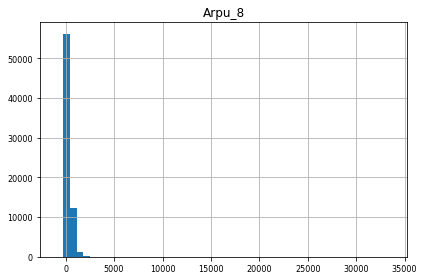

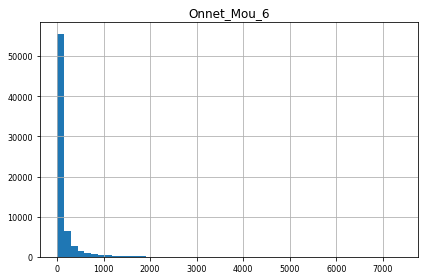

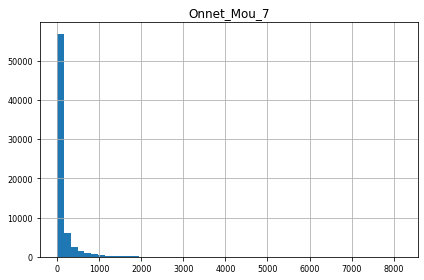

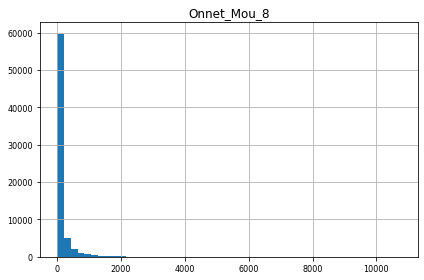

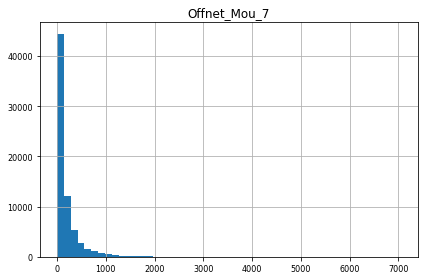

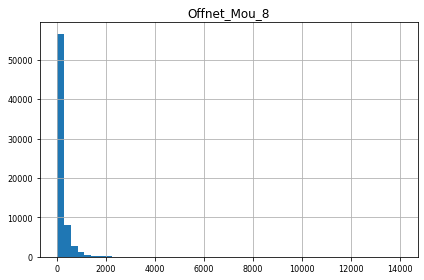

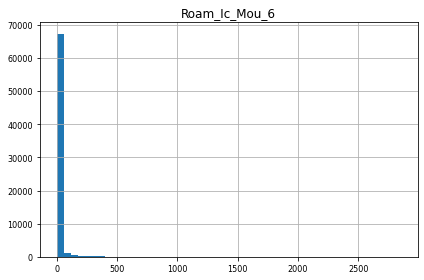

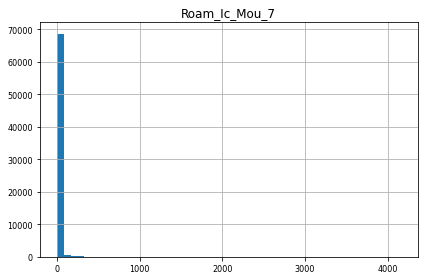

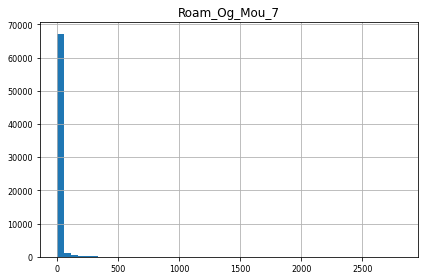

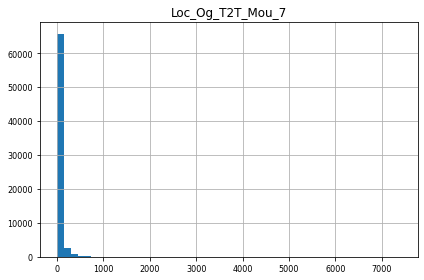

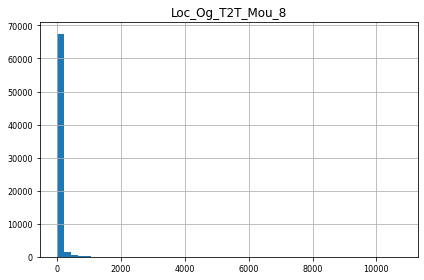

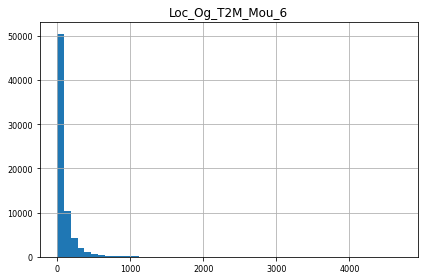

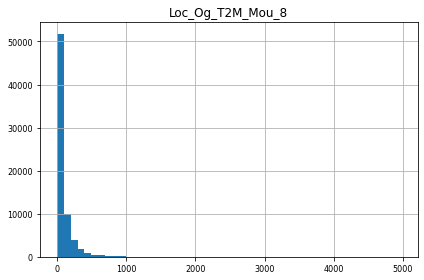

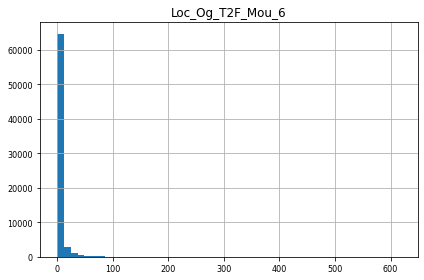

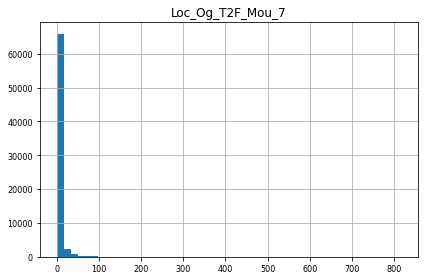

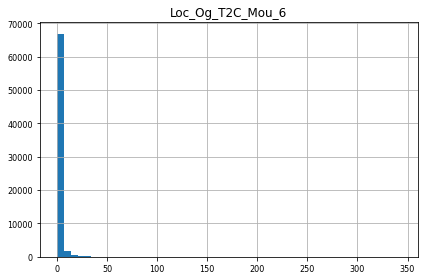

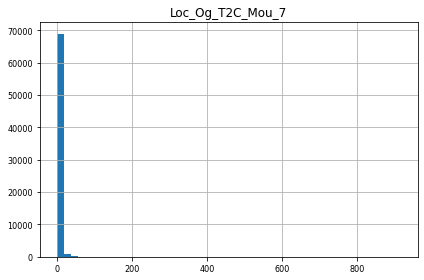

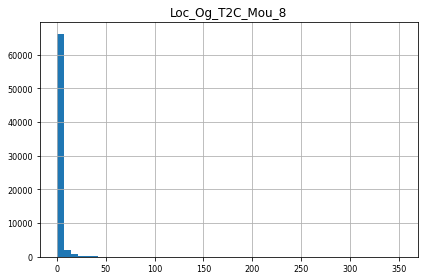

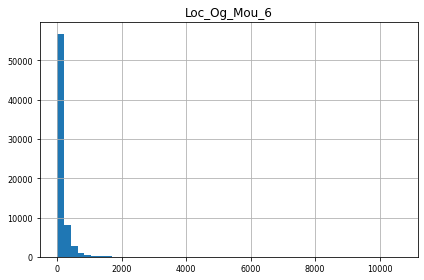

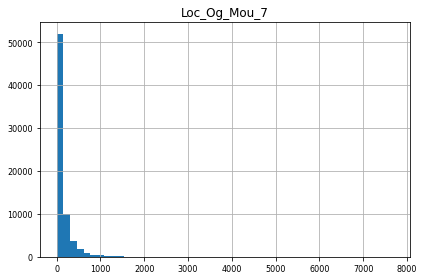

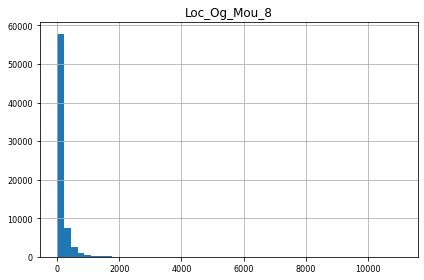

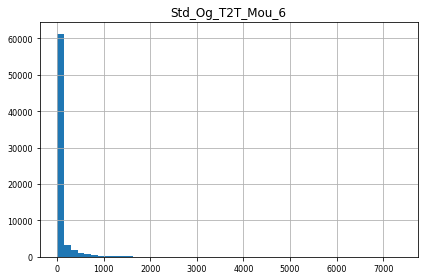

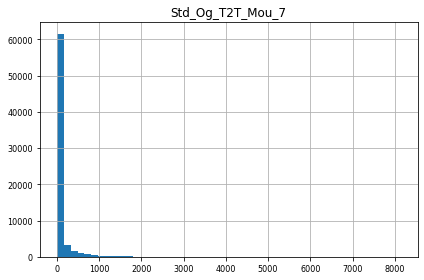

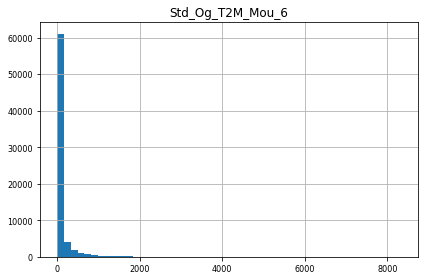

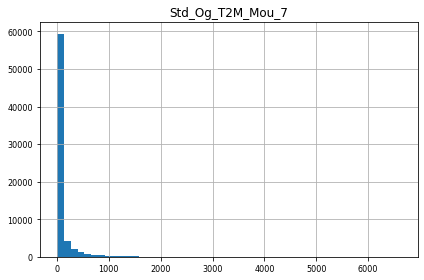

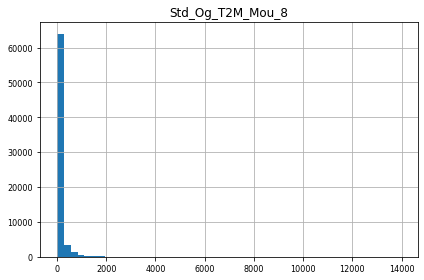

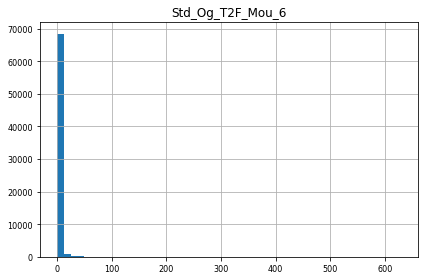

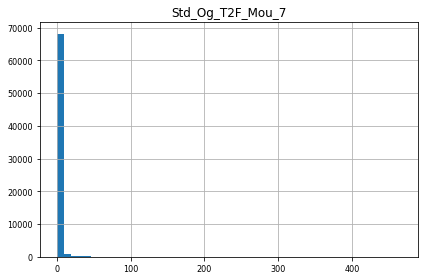

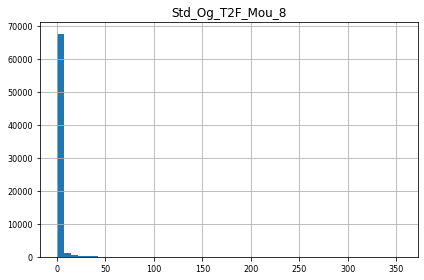

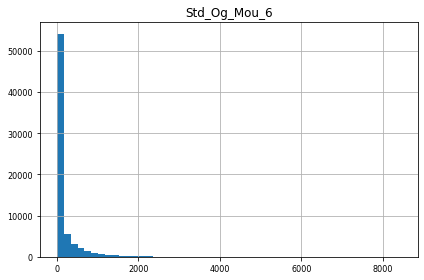

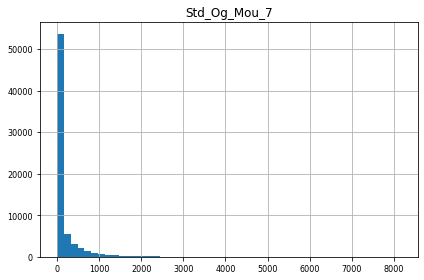

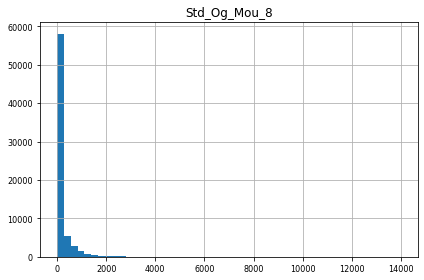

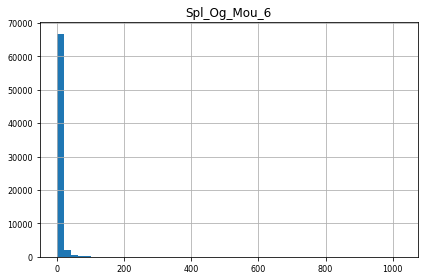

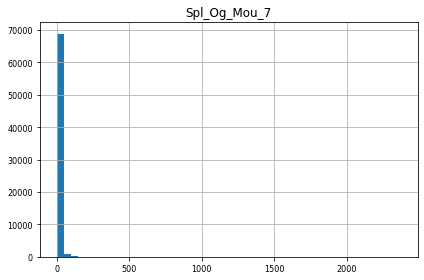

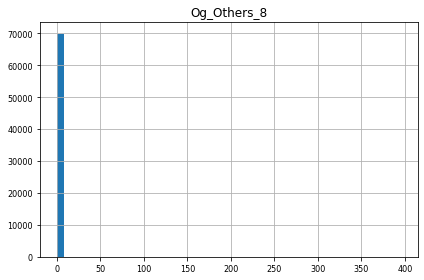

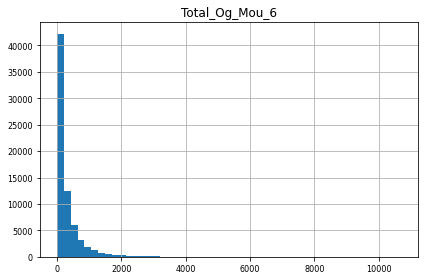

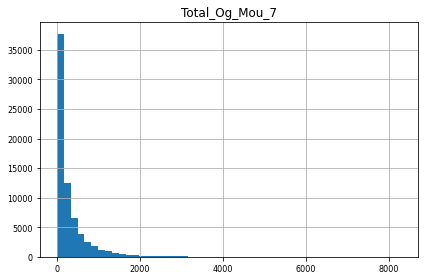

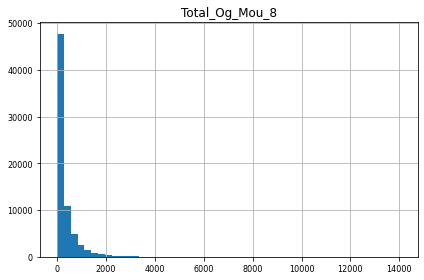

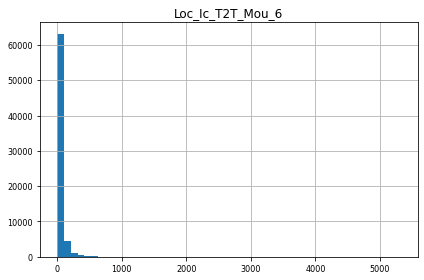

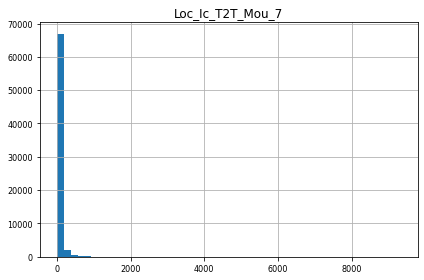

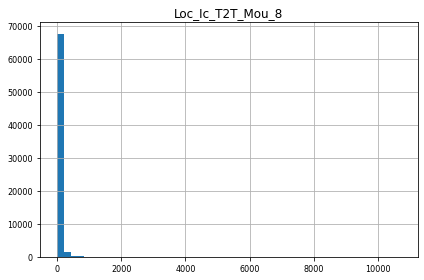

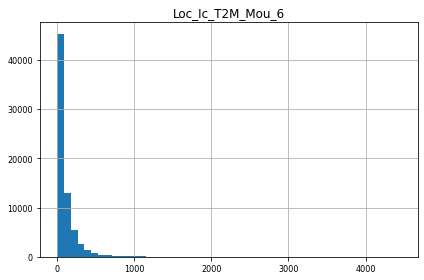

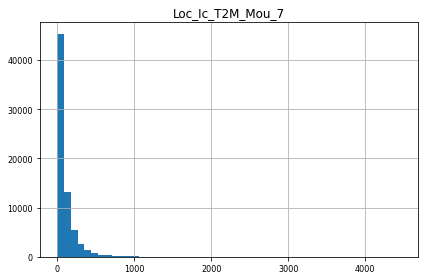

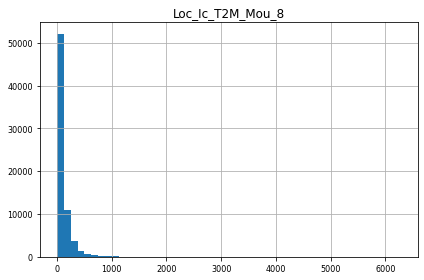

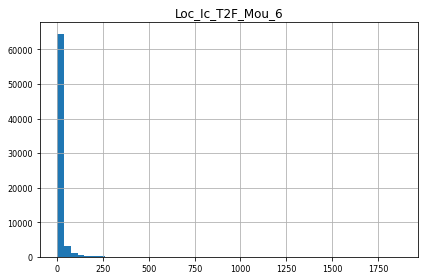

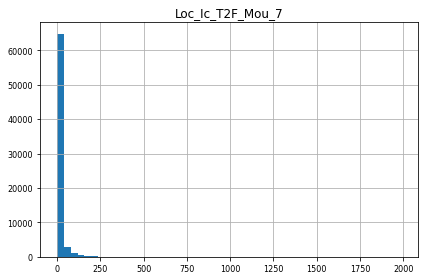

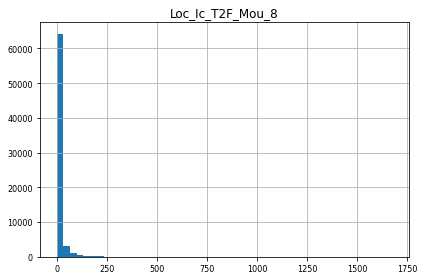

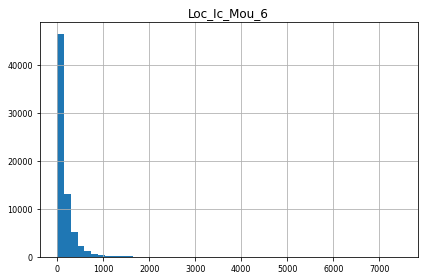

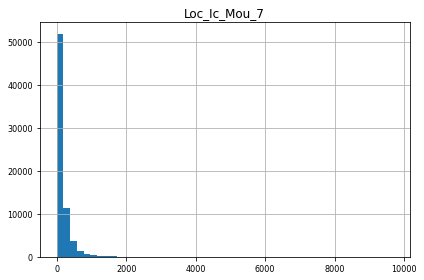

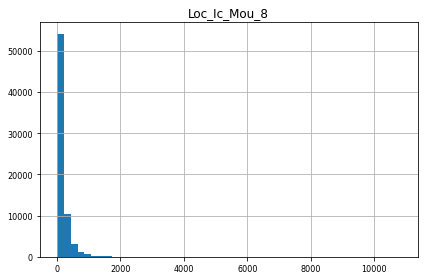

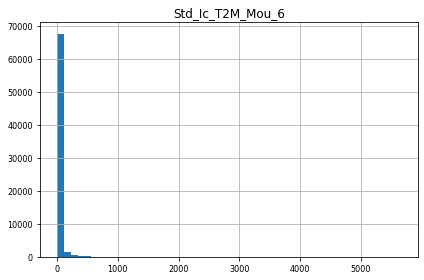

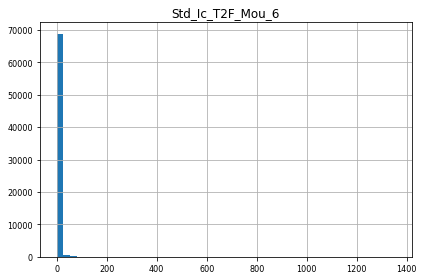

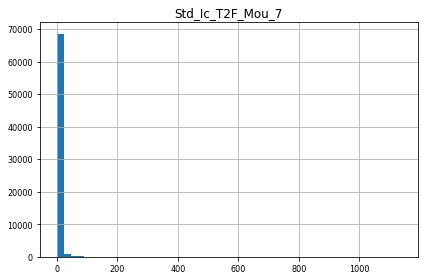

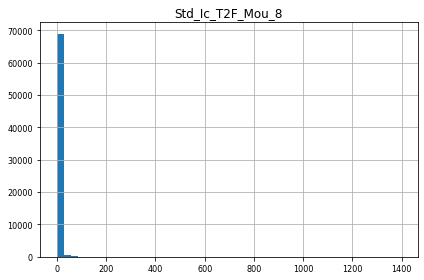

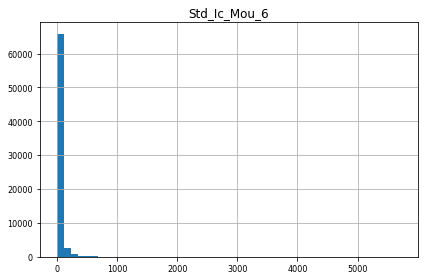

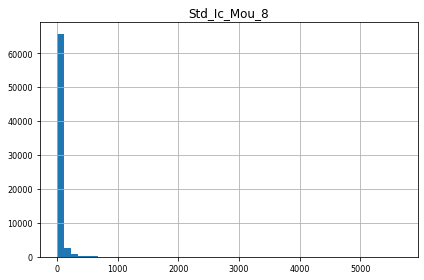

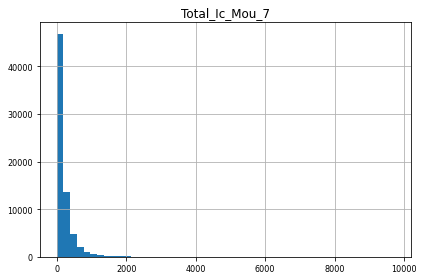

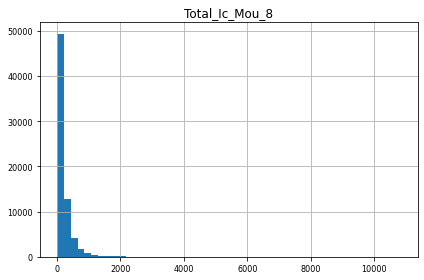

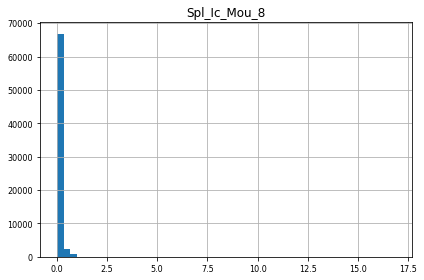

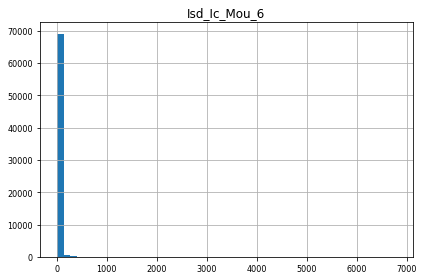

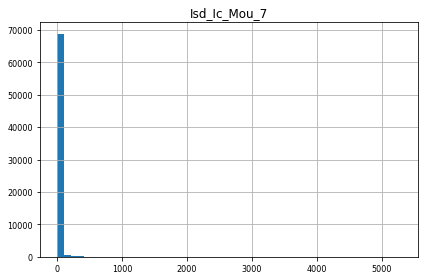

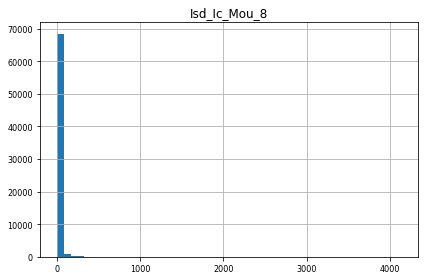

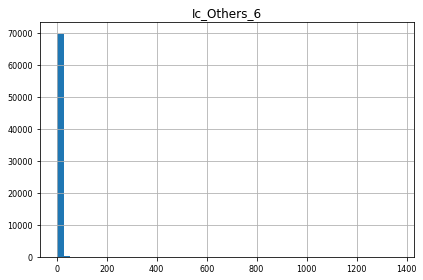

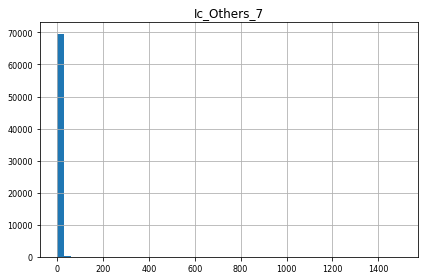

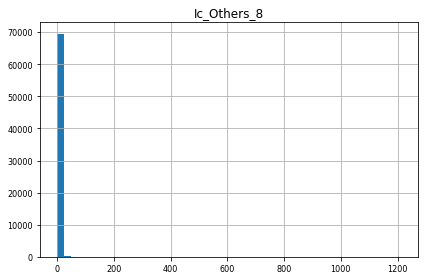

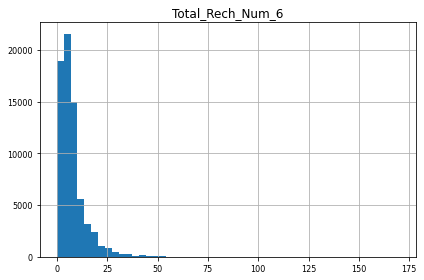

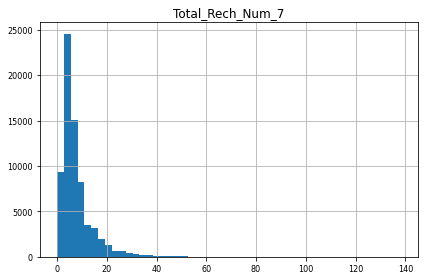

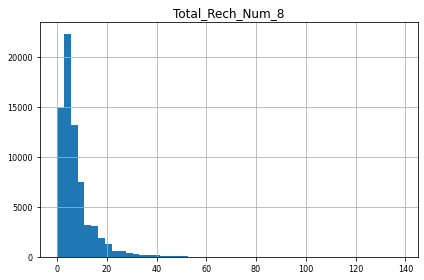

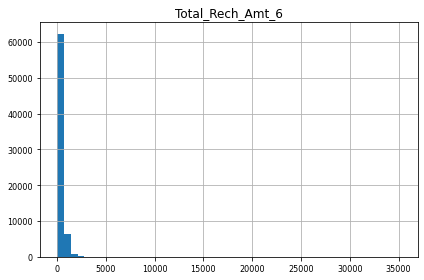

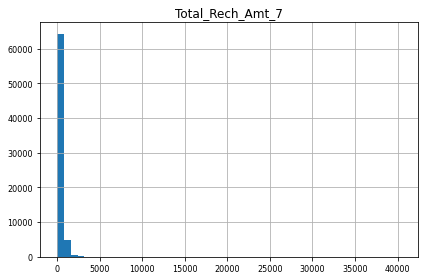

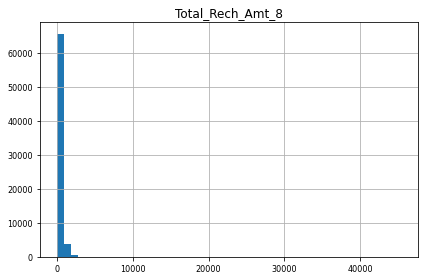

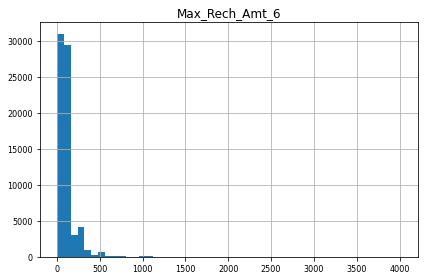

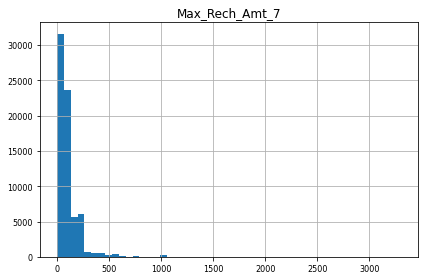

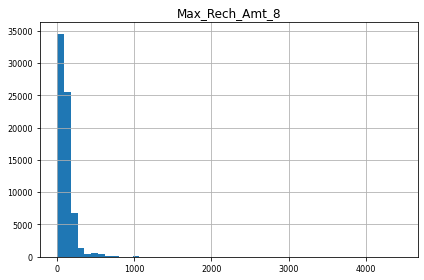

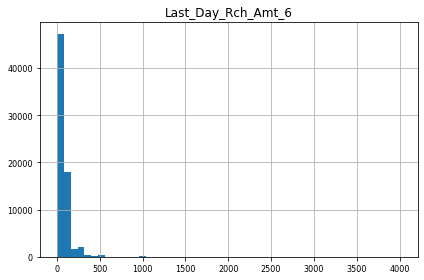

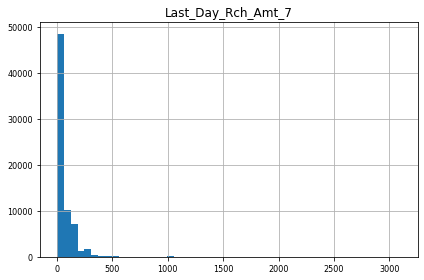

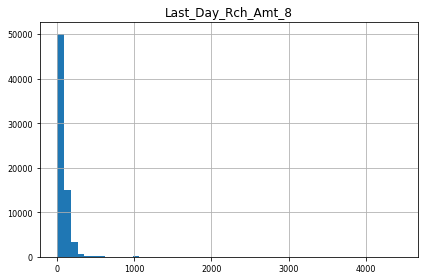

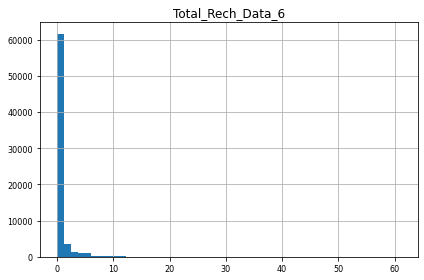

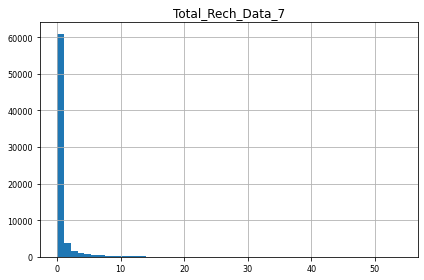

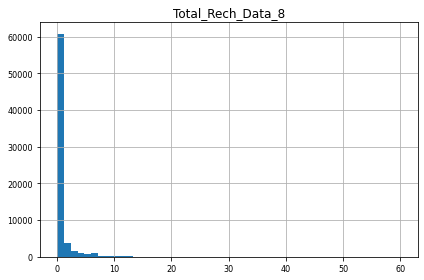

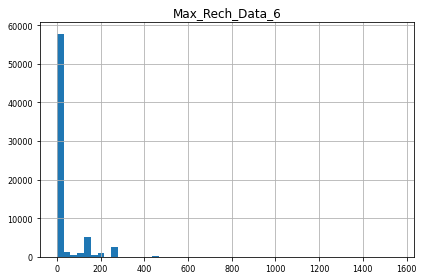

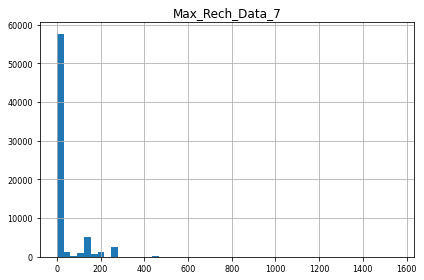

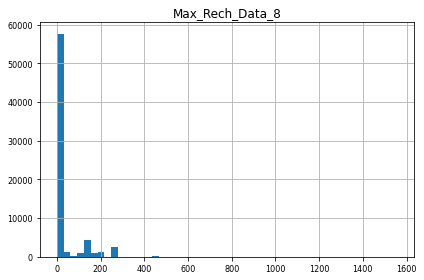

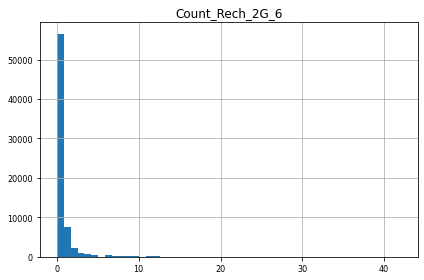

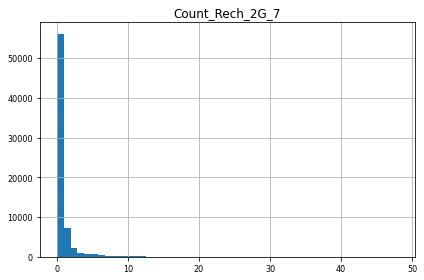

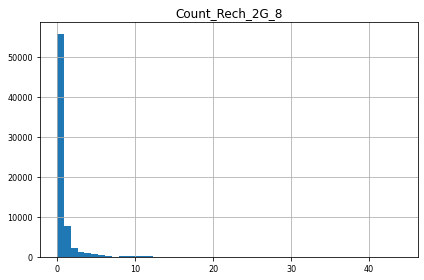

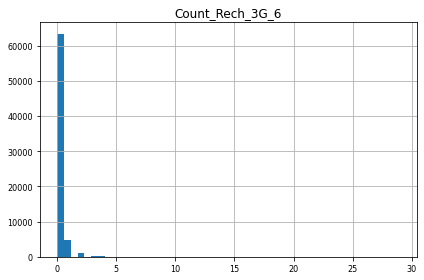

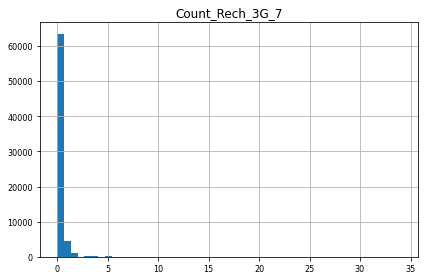

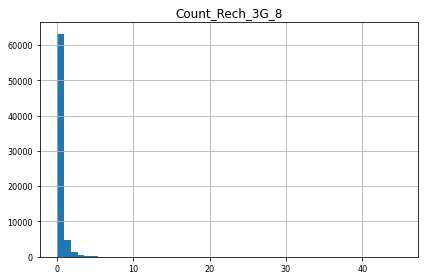

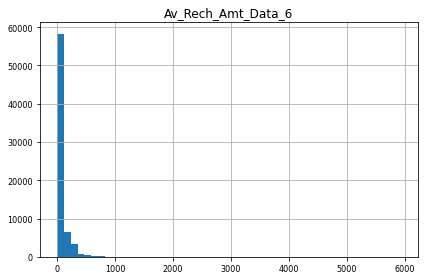

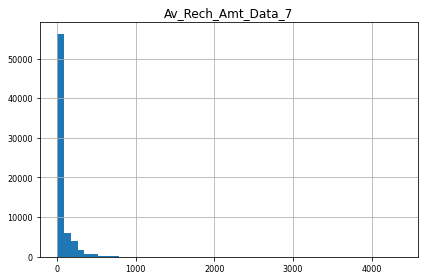

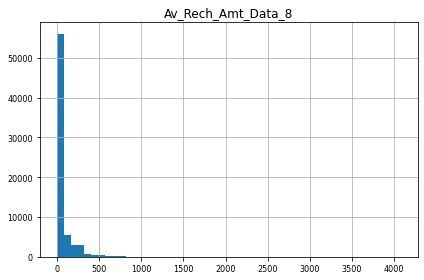

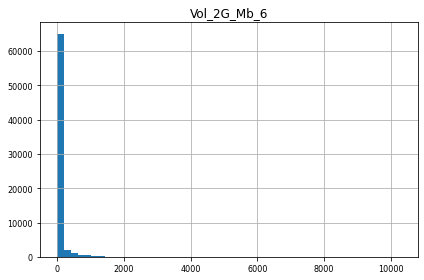

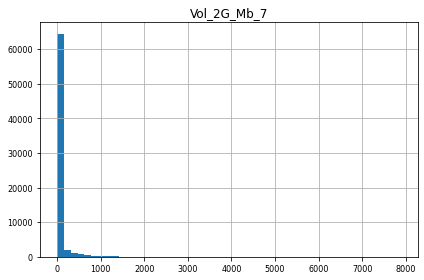

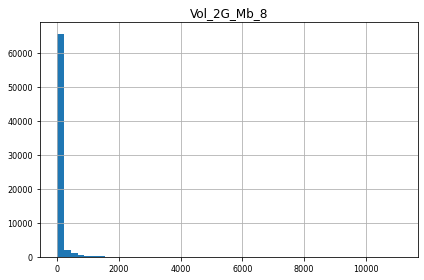

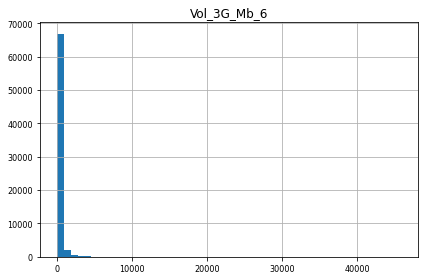

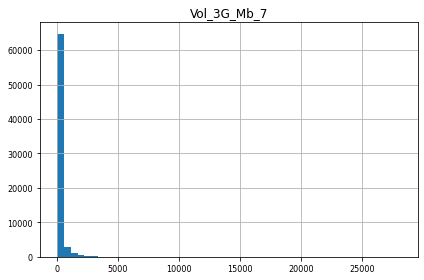

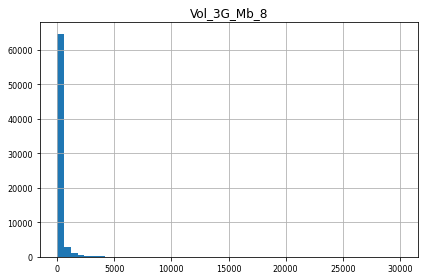

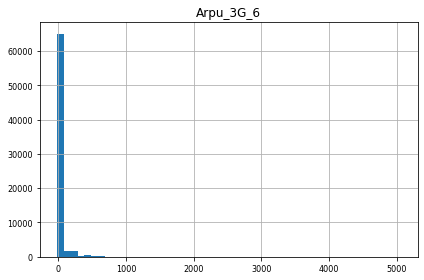

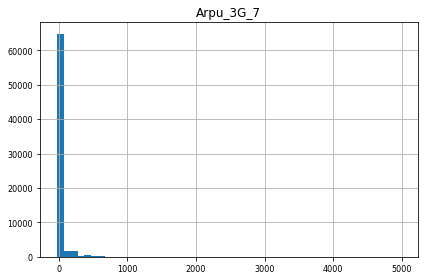

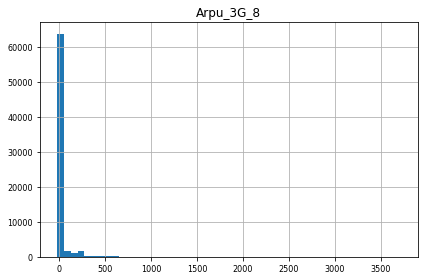

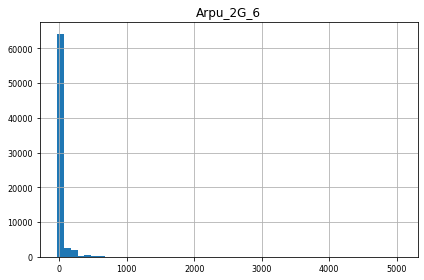

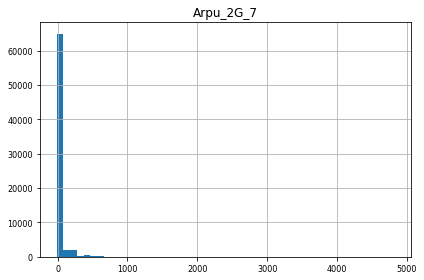

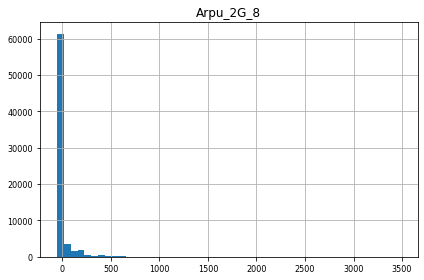

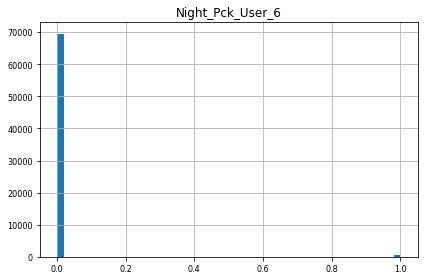

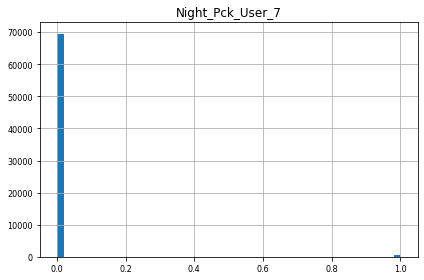

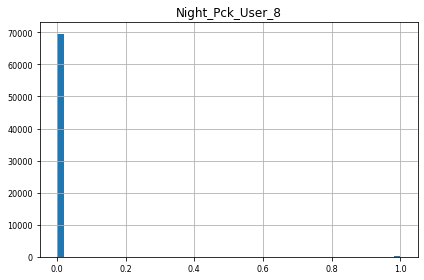

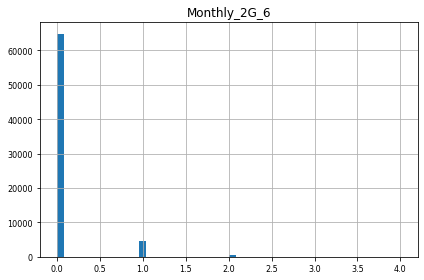

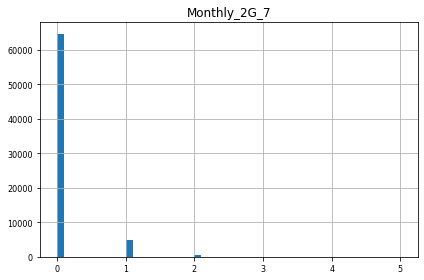

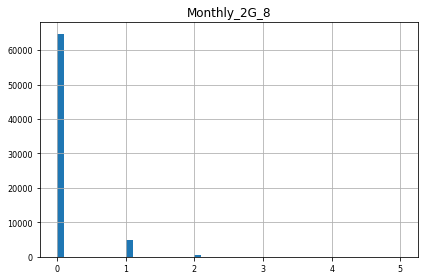

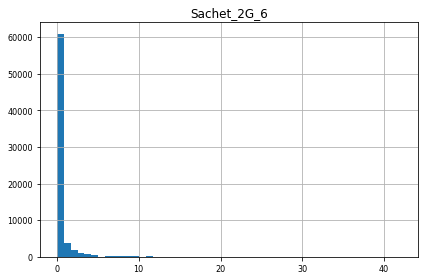

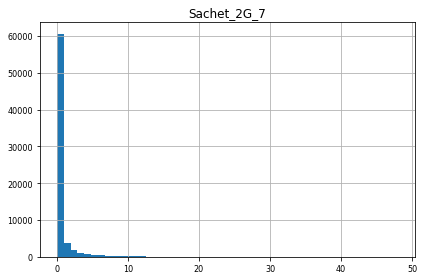

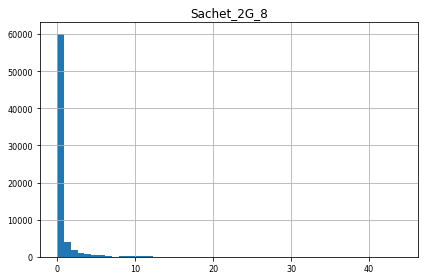

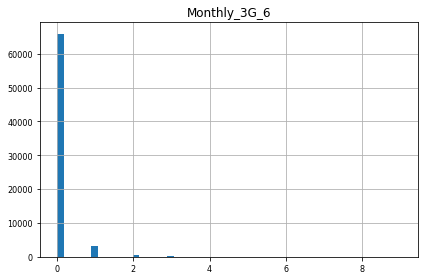

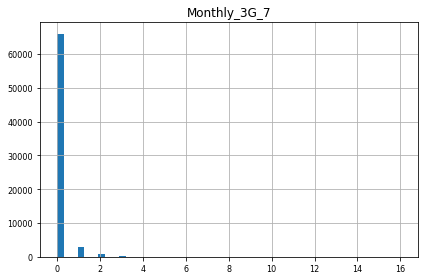

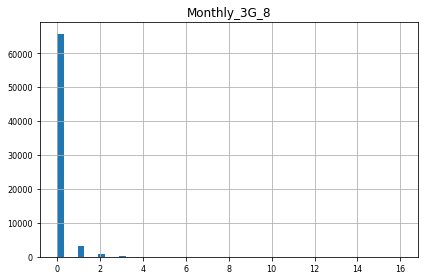

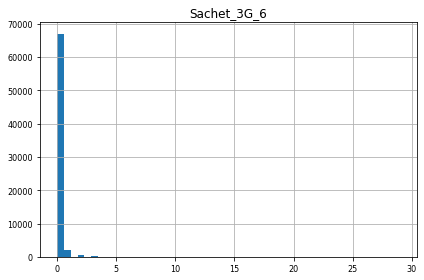

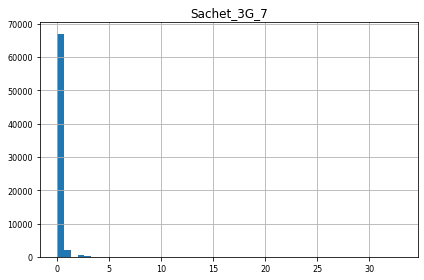

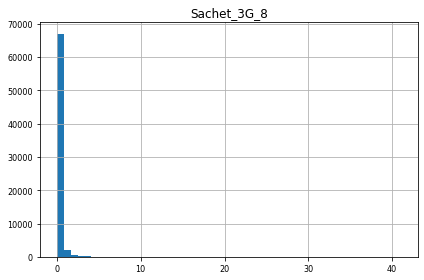

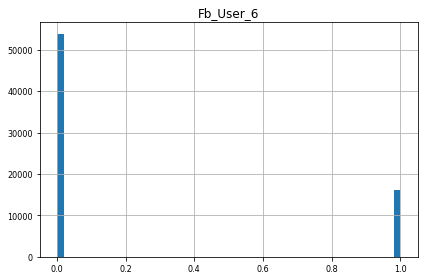

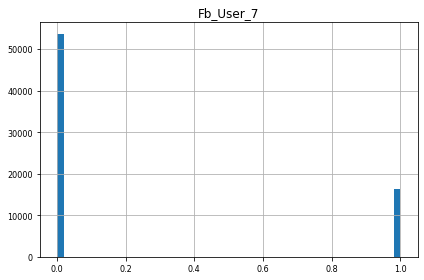

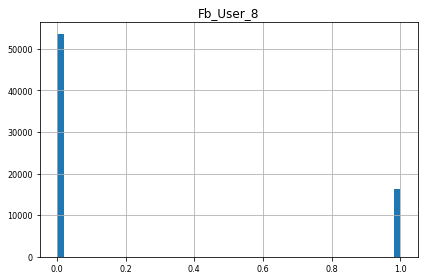

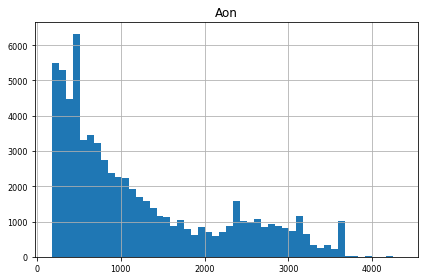

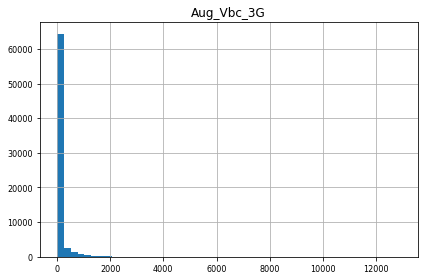

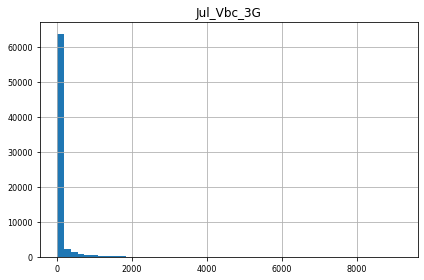

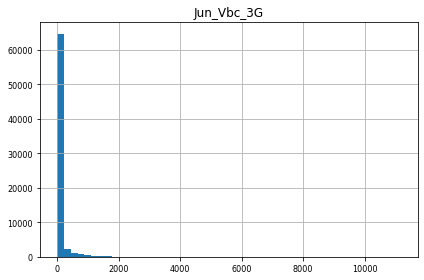

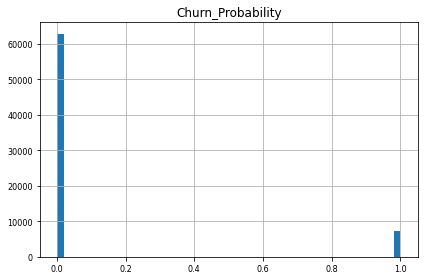

In [22]:
#Checking hist diagran of all number columns
def plotHistChart(i):
    plt.subplot(1,1,1)
    ax = data_train[i].hist(bins=50, xlabelsize=8, ylabelsize=8)
    ax.set_title(i.title())
    plt.tight_layout()
    plt.show()
    
for i in data_train.select_dtypes(include=['number']):
    plotHistChart(i)



In [23]:
data_train.describe()

id        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean   34999.000000    283.134365    278.185912    278.858826    127.887939   
std    20207.115084    334.213918    344.366927    351.924315    295.115497   
min        0.000000  -2258.709000  -1289.715000   -945.808000      0.000000   
25%    17499.500000     93.581000     86.714000     84.095000      5.430000   
50%    34999.000000    197.484000    191.588000    192.234000     30.830000   
75%    52498.500000    370.791000    365.369500    369.909000    113.100000   
max    69998.000000  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean     128.754731    125.943607    191.010582    189.585401    186.146273   
std      306.326345    304.990552    312.900706    318.492632    318.453812   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        4.910000      4.110000     28.790000     26.690000     23.780000   
50%       29.160000     27.840000     89.810000     85.590000     83.010000   
75%      108.940000    106.280000    223.540000    218.350000    216.410000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   69999.000000   69999.000000   69999.000000   69999.000000   
mean        9.379276       6.745305       6.634328      13.625476   
std        56.260778      54.892940      51.999899      72.055036   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   69999.000000   69999.000000      69999.000000      69999.000000   
mean        9.464386       9.254848         45.050076         44.394344   
std        57.409013      62.923987        148.238746        151.998993   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.010000          1.010000   
50%         0.000000       0.000000         10.660000         10.430000   
75%         0.000000       0.000000         38.680000         37.780000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean          43.269280         89.551272         87.313796         86.301054   
std          149.944829        159.846546        151.875981        150.286404   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.760000          7.290000          7.530000          6.440000   
50%           10.060000         37.680000         37.010000         35.940000   
75%           37.260000        105.685000        103.330000        103.110000   
max        10752.560000       4696.830000       4557.140000       4961.330000   

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean           3.595161          3.632045          3.467948          1.081499   
std           13.073900         13.324919         12.686917          5.631416   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000  

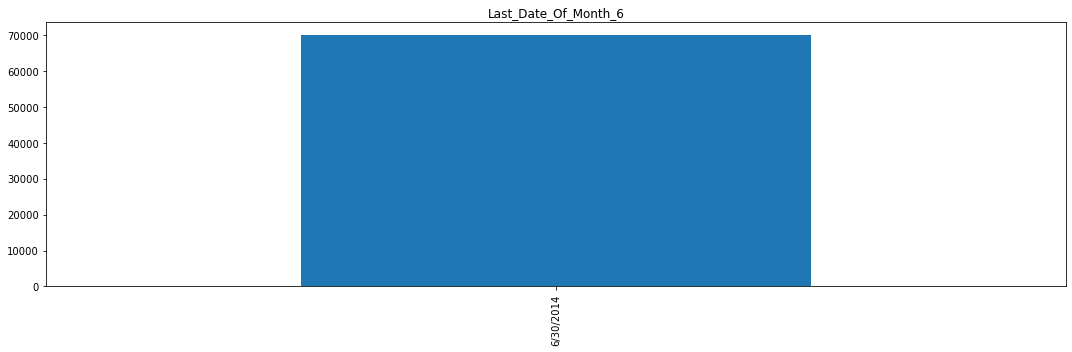

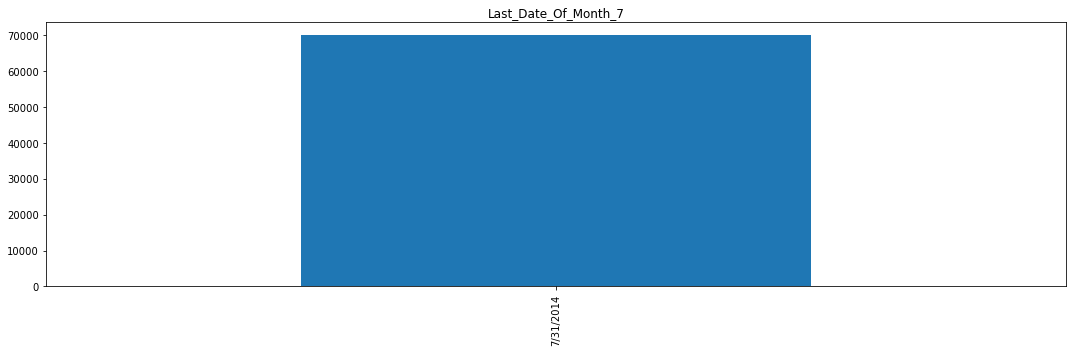

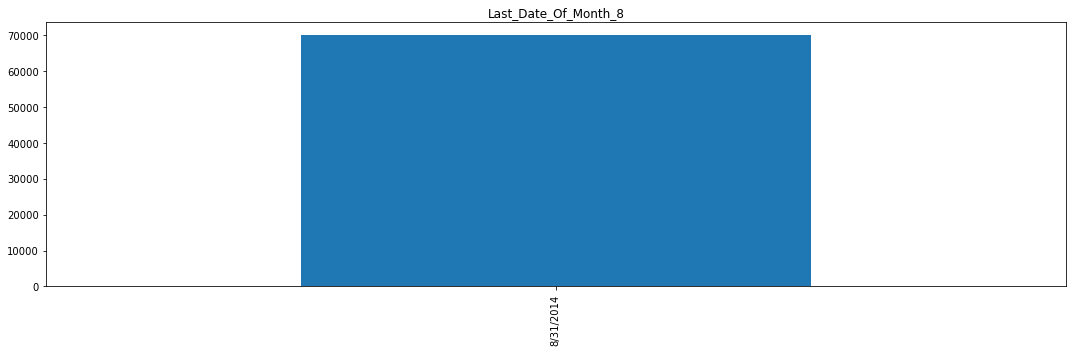

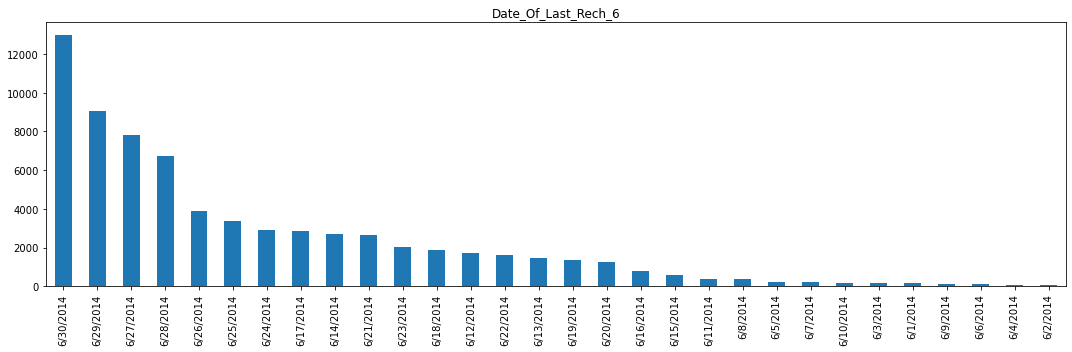

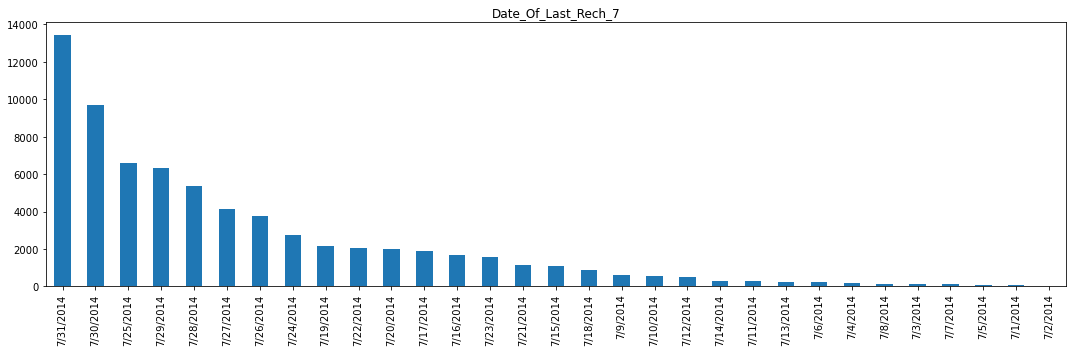

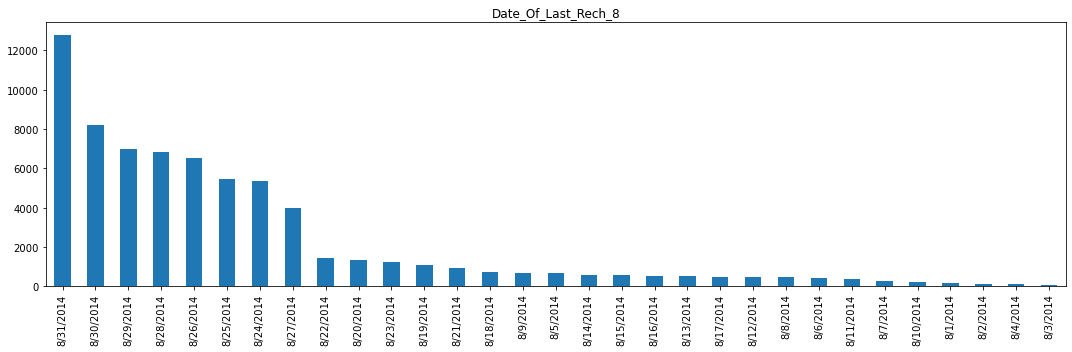

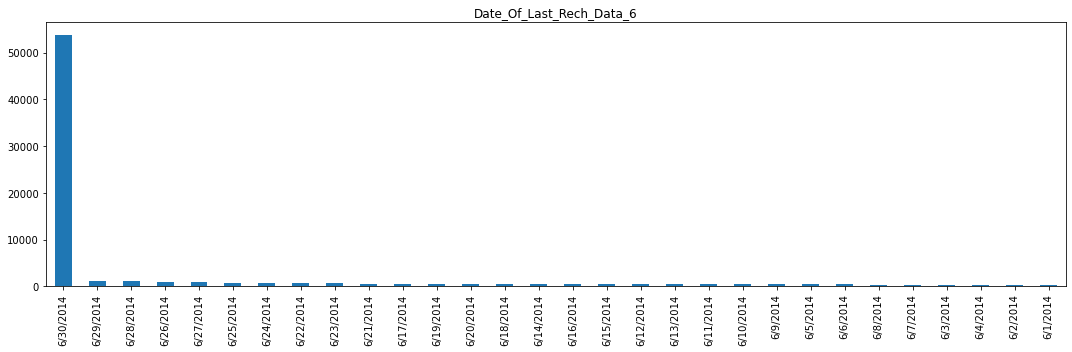

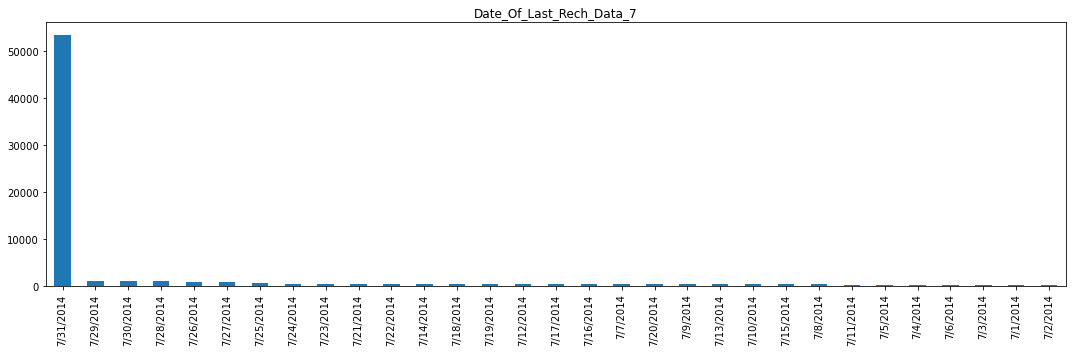

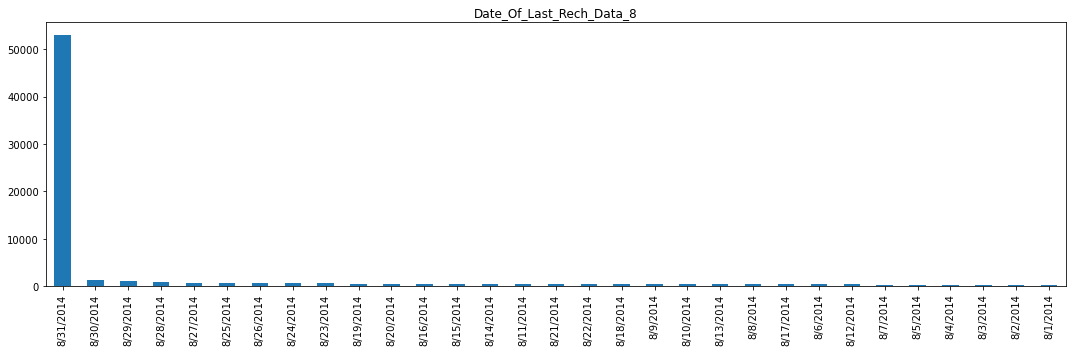

In [24]:
#Checking all Object columns bar graphs
def plotBarChart(i):
    plt.figure(figsize=(15, 5))
    plt.subplot(1,1,1)
    ax = data_train[i].value_counts().plot.bar()
    ax.set_title(i.title())
    plt.tight_layout()
    plt.show()

for i in data_train.select_dtypes(include=['object']):
    plotBarChart(i)

In [25]:
data_train.filter(regex='ic').filter(regex='_6').head()

roam_ic_mou_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  \
0           0.00              2.43              0.83              0.00   
1           0.00              1.68              1.41              0.35   
2           0.00              4.51             89.86              0.00   
3           0.00             24.98             53.99              7.23   
4          53.64              5.44             10.58              5.51   

   loc_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
0          3.26              0.00              7.46               0.0   
1          3.44              0.00              0.00               0.0   
2         94.38             11.69             18.21               0.0   
3         86.21              0.00              8.89               0.0   
4         21.54              0.00              0.00               0.0   

   std_ic_mou_6  total_ic_mou_6  spl_ic_mou_6  isd_ic_mou_6  ic_others_6  
0          7.46           11.84           0.0           0.0         1.11  
1          0.00            3.44           0.0           0.0         0.00  
2         29.91          124.29           0.0           0.0         0.00  
3          8.89           95.11           0.0           0.0         0.00  
4          0.00           21.54           0.0           0.0         0.00

In [26]:
data_train.filter(regex='rech').filter(regex='_6').head()

total_rech_num_6  total_rech_amt_6  max_rech_amt_6 date_of_last_rech_6  \
0                 3                77              65           6/22/2014   
1                 3                 0               0           6/12/2014   
2                 2                70              70           6/11/2014   
3                 2               160             110           6/15/2014   
4                13               290              50           6/25/2014   

  date_of_last_rech_data_6  total_rech_data_6  max_rech_data_6  \
0                6/30/2014                0.0              0.0   
1                6/30/2014                0.0              0.0   
2                6/30/2014                0.0              0.0   
3                6/30/2014                0.0              0.0   
4                6/25/2014                7.0             25.0   

   count_rech_2g_6  count_rech_3g_6  av_rech_amt_data_6  
0              0.0              0.0                 0.0  
1              0.0              0.0                 0.0  
2              0.0              0.0                 0.0  
3              0.0              0.0                 0.0  
4              7.0              0.0               175.0

In [27]:
#Calculate total recharge and merge columns
data_train['total_data_rech_amt_6'] = data_train['total_rech_data_6'] * data_train['av_rech_amt_data_6']
data_train['total_data_rech_amt_7'] = data_train['total_rech_data_7'] * data_train['av_rech_amt_data_7']
data_train['total_data_rech_amt_8'] = data_train['total_rech_data_8'] * data_train['av_rech_amt_data_8']
data_train['total_rech_6'] = data_train[['total_data_rech_amt_6','total_rech_amt_6']].sum(axis=1)
data_train['total_rech_7'] = data_train[['total_data_rech_amt_7','total_rech_amt_7']].sum(axis=1)
data_train['total_rech_8'] = data_train[['total_data_rech_amt_8','total_rech_amt_8']].sum(axis=1)

drop_data_rech_columns = ['total_rech_data_6','av_rech_amt_data_6',
                         'total_rech_data_7','av_rech_amt_data_7',
                         'total_rech_data_8','av_rech_amt_data_8',
                         'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
                         'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 
                         'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']
data_train.drop(drop_data_rech_columns,axis=1,inplace=True)

In [28]:
data_test['total_data_rech_amt_6'] = data_test['total_rech_data_6'] * data_test['av_rech_amt_data_6']
data_test['total_data_rech_amt_7'] = data_test['total_rech_data_7'] * data_test['av_rech_amt_data_7']
data_test['total_data_rech_amt_8'] = data_test['total_rech_data_8'] * data_test['av_rech_amt_data_8']
data_test['total_rech_6'] = data_test[['total_data_rech_amt_6','total_rech_amt_6']].sum(axis=1)
data_test['total_rech_7'] = data_test[['total_data_rech_amt_7','total_rech_amt_7']].sum(axis=1)
data_test['total_rech_8'] = data_test[['total_data_rech_amt_8','total_rech_amt_8']].sum(axis=1)

data_test.drop(drop_data_rech_columns,axis=1,inplace=True)

In [29]:
#Calculate Roaming
data_train['roam_6'] = data_train[['roam_ic_mou_6', 'roam_og_mou_6']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)
data_train['roam_7'] = data_train[['roam_ic_mou_7', 'roam_og_mou_7']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)
data_train['roam_8'] = data_train[['roam_ic_mou_8', 'roam_og_mou_8']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)

drop_roam_columns =['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 
                    'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8']
data_train.drop(drop_roam_columns,axis=1,inplace=True)

In [30]:
data_test['roam_6'] = data_test[['roam_ic_mou_6', 'roam_og_mou_6']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)
data_test['roam_7'] = data_test[['roam_ic_mou_7', 'roam_og_mou_7']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)
data_test['roam_8'] = data_test[['roam_ic_mou_8', 'roam_og_mou_8']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)

data_test.drop(drop_roam_columns,axis=1,inplace=True)

In [31]:
#Calculate Local
data_train['local_6'] = data_train[['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['local_7'] = data_train[['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['local_8'] = data_train[['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

drop_loc_columns = ['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 
                    'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 
                    'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 
                    'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 
                    'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
                    'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
                    'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 
                    'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 
                    'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8']
data_train.drop(drop_loc_columns,axis=1,inplace=True)

In [32]:
data_test['local_6'] = data_test[['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['local_7'] = data_test[['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['local_8'] = data_test[['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

data_test.drop(drop_loc_columns,axis=1,inplace=True)

In [33]:
#Calculate STD
data_train['std_6'] = data_train[['std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['std_7'] = data_train[['std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['std_8'] = data_train[['std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

drop_std_columns = ['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 
                    'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 
                    'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 
                    'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 
                    'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
                    'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 
                    'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 
                    'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8']
data_train.drop(drop_std_columns,axis=1,inplace=True)

In [34]:
data_test['std_6'] = data_test[['std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['std_7'] = data_test[['std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['std_8'] = data_test[['std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

data_test.drop(drop_std_columns,axis=1,inplace=True)

In [35]:
#Calculate SPL
data_train['spl_6'] = data_train[['isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['spl_7'] = data_train[['isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['spl_8'] = data_train[['isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

drop_spl_columns = ['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 
                    'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 
                    'og_others_6', 'og_others_7', 'og_others_8',  
                    'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 
                    'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 
                    'ic_others_6', 'ic_others_7', 'ic_others_8']
data_train.drop(drop_spl_columns,axis=1,inplace=True)

In [36]:
data_test['spl_6'] = data_test[['isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['spl_7'] = data_test[['isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['spl_8'] = data_test[['isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

data_test.drop(drop_spl_columns,axis=1,inplace=True)

In [37]:
#Calculate Data usage
data_train['data_used_6'] = data_train[['vol_2g_mb_6', 'vol_3g_mb_6', 'jun_vbc_3g']].sum(axis=1)
data_train['data_used_7'] = data_train[['vol_2g_mb_7', 'vol_3g_mb_7', 'jul_vbc_3g']].sum(axis=1)
data_train['data_used_8'] = data_train[['vol_2g_mb_8', 'vol_3g_mb_8', 'aug_vbc_3g']].sum(axis=1)
drop_data_usage_columns = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 
                           'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 
                           'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']
data_train.drop(drop_data_usage_columns,axis=1,inplace=True)

In [38]:
data_test['data_used_6'] = data_test[['vol_2g_mb_6', 'vol_3g_mb_6', 'jun_vbc_3g']].sum(axis=1)
data_test['data_used_7'] = data_test[['vol_2g_mb_7', 'vol_3g_mb_7', 'jul_vbc_3g']].sum(axis=1)
data_test['data_used_8'] = data_test[['vol_2g_mb_8', 'vol_3g_mb_8', 'aug_vbc_3g']].sum(axis=1)

data_test.drop(drop_data_usage_columns,axis=1,inplace=True)

In [39]:
#Drop other insignificant colums based on data values

drop_others_columns=['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
                    'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                    'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 
                    'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
                    'offnet_mou_6','offnet_mou_7','offnet_mou_8',
                    'fb_user_6','fb_user_7','fb_user_8',
                    'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
                    'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']
data_train.drop(drop_others_columns,axis=1,inplace=True)

data_test.drop(drop_others_columns,axis=1,inplace=True)

In [40]:
data_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     69999 non-null  int64  
 1   arpu_6                 69999 non-null  float64
 2   arpu_7                 69999 non-null  float64
 3   arpu_8                 69999 non-null  float64
 4   total_og_mou_6         69999 non-null  float64
 5   total_og_mou_7         69999 non-null  float64
 6   total_og_mou_8         69999 non-null  float64
 7   total_ic_mou_6         69999 non-null  float64
 8   total_ic_mou_7         69999 non-null  float64
 9   total_ic_mou_8         69999 non-null  float64
 10  total_rech_amt_6       69999 non-null  int64  
 11  total_rech_amt_7       69999 non-null  int64  
 12  total_rech_amt_8       69999 non-null  int64  
 13  last_day_rch_amt_6     69999 non-null  int64  
 14  last_day_rch_amt_7     69999 non-null  int64  
 15  la

In [41]:
data_train.head()

id   arpu_6   arpu_7   arpu_8  total_og_mou_6  total_og_mou_7  \
0   0   31.277   87.009    7.527           81.21          221.68   
1   1    0.000  122.787   42.953            0.00           30.73   
2   2   60.806  103.176    0.000           56.49           99.36   
3   3  156.362  205.260  111.095           76.03           95.98   
4   4  240.708  128.191  101.565           63.26           42.94   

   total_og_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
0            3.63           11.84           53.04           40.56   
1           31.66            3.44           39.44           25.04   
2            0.00          124.29           33.83           36.64   
3           53.84           95.11           50.18           83.84   
4           15.76           21.54            9.36           28.31   

   total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  last_day_rch_amt_6  \
0                77                65                10                  65   
1                 0               145                50                   0   
2                70               120                 0                  70   
3               160               240               130                 110   
4               290               136               122                  25   

   last_day_rch_amt_7  last_day_rch_amt_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  \
0                  65                   0        0.0       0.00        0.0   
1                   0                   0        0.0     122.07        0.0   
2                  50                   0        0.0       0.00        0.0   
3                 110                  50        0.0       0.00        0.0   
4                  10                  30        0.0      35.00        0.0   

   arpu_2g_6  arpu_2g_7  arpu_2g_8  night_pck_user_6  night_pck_user_7  \
0        0.0       0.00        0.0               0.0               0.0   
1        0.0     122.08        0.0               0.0               0.0   
2        0.0       0.00        0.0               0.0               0.0   
3        0.0       0.00        0.0               0.0               0.0   
4        0.0      35.12        0.0               0.0               0.0   

   night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  \
0               0.0             0             0             0            0   
1               0.0             0             0             0            0   
2               0.0             0             0             0            0   
3               0.0             0             0             0            0   
4               0.0             0             0             0            7   

   sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  \
0            0            0             0             0             0   
1            0            0             0             1             0   
2            0            0             0             0             0   
3            0            0             0             0             0   
4            6            6             0             0             0   

   sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  churn_probability  \
0            0            0            0  1958                  0   
1            0            0            0   710                  0   
2            0            0            0   882                  0   
3            0            0            0   982                  0   
4            0            1            0   647                  0   

   total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  \
0                    0.0                    0.0                    0.0   
1                    0.0                  145.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                 1225.0                 1337.0                  852.0   

   total_rech_6  total

## Step 3: Data Preparation for modelling

- The data is highly imbalance and biased towards non-churn customers.
- Hence using smote to resolve the data imbalance issue.

In [42]:
X_train = data_train.drop(['churn_probability'], axis=1)
y_train = data_train['churn_probability']

X_test = data_test.copy()

In [43]:
#Since class is inbalanced using SMOTE to balance
!pip install -U imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

X_tr = data_train.drop(['churn_probability'], axis=1)
y_tr = pd.DataFrame(data_train['churn_probability'])


sm = SMOTE(random_state=42,sampling_strategy='all')
X_train,y_train = sm.fit_resample(X_tr,y_tr)

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(125734, 59)
(125734, 1)
(30000, 59)


0    50.0
1    50.0
Name: churn_probability, dtype: float64


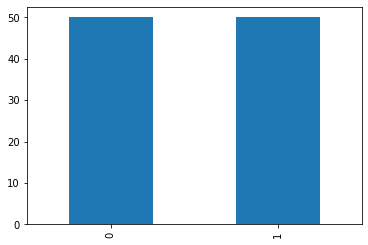

In [45]:
# After SMOTE check the class balance
print(round(y_train.churn_probability.value_counts()*100/len(y_train),2))
round(y_train.churn_probability.value_counts()*100/len(y_train),2).plot.bar()
plt.show()

## Step 4: Splitting the Data into Training and Testing Sets and scaling

As you know, the first basic step is performing a train-test split. However in this case we have train and test csvs already separated. Hence continuing only with scaling in this step.


In [46]:
#Scaling 
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

In [47]:
X_train.head()

id    arpu_6    arpu_7    arpu_8  total_og_mou_6  total_og_mou_7  \
0 -1.727973 -0.769848 -0.491018 -0.624596       -0.495255       -0.111733   
1 -1.727923 -0.864530 -0.378123 -0.508152       -0.662486       -0.523203   
2 -1.727874 -0.680457 -0.440004 -0.649336       -0.546159       -0.375315   
3 -1.727824 -0.391190 -0.117885 -0.284171       -0.505922       -0.382599   
4 -1.727775 -0.135857 -0.361071 -0.315496       -0.532218       -0.496892   

   total_og_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
0       -0.497420       -0.585946       -0.375656       -0.351582   
1       -0.428220       -0.618039       -0.429035       -0.416917   
2       -0.506381       -0.156324       -0.451054       -0.368084   
3       -0.373462       -0.267808       -0.386882       -0.169384   
4       -0.467473       -0.548887       -0.547096       -0.403151   

   total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  last_day_rch_amt_6  \
0         -0.634214         -0.558839         -0.586132            0.076355   
1         -0.828787         -0.348099         -0.476896           -0.659451   
2         -0.651903         -0.413956         -0.613441            0.132956   
3         -0.424480         -0.097846         -0.258425            0.585760   
4         -0.095981         -0.371808         -0.280272           -0.376448   

   last_day_rch_amt_7  last_day_rch_amt_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  \
0            0.194958           -0.481589  -0.207652  -0.199744  -0.188386   
1           -0.563769           -0.481589  -0.207652   1.150667  -0.188386   
2            0.019867           -0.481589  -0.207652  -0.199744  -0.188386   
3            0.720230            0.092154  -0.207652  -0.199744  -0.188386   
4           -0.447042           -0.137343  -0.207652   0.187447  -0.188386   

   arpu_2g_6  arpu_2g_7  arpu_2g_8  night_pck_user_6  night_pck_user_7  \
0  -0.229189  -0.210351  -0.196783          -0.08888         -0.074807   
1  -0.229189   1.247027  -0.196783          -0.08888         -0.074807   
2  -0.229189  -0.210351  -0.196783          -0.08888         -0.074807   
3  -0.229189  -0.210351  -0.196783          -0.08888         -0.074807   
4  -0.229189   0.208908  -0.196783          -0.08888         -0.074807   

   night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  \
0         -0.062369     -0.205881     -0.206345     -0.200107    -0.236475   
1         -0.062369     -0.205881     -0.206345     -0.200107    -0.236475   
2         -0.062369     -0.205881     -0.206345     -0.200107    -0.236475   
3         -0.062369     -0.205881     -0.206345     -0.200107    -0.236475   
4         -0.062369     -0.205881     -0.206345     -0.200107     5.063783   

   sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  \
0    -0.229460    -0.214529     -0.176489      -0.16692     -0.164446   
1    -0.229460    -0.214529     -0.176489       3.12885     -0.164446   
2    -0.229460    -0.214529     -0.176489      -0.16692     -0.164446   
3    -0.229460    -0.214529     -0.176489      -0.16692     -0.164446   
4     4.049613     4.518933     -0.176489      -0.16692     -0.164446   

   sachet_3g_6  sachet_3g_7  sachet_3g_8       aon  total_data_rech_amt_6  \
0    -0.117211    -0.108731    -0.097854  1.052093              -0.195167   
1    -0.117211    -0.108731    -0.097854 -0.379631              -0.195167   
2    -0.117211    -0.108731    -0.097854 -0.182310              -0.195167   
3    -0.117211    -0.108731    -0.097854 -0.067589              -0.195167   
4    -0.117211     1.836798    -0.097854 -0.451906               1.734091   

   total_data_rech_amt_7  total_data_rech_amt_8  total_rech_6  total_rech_7  \
0              -0.180641              -0.147762     -0.466599     -0.390397   
1               0.023916              -0.147762     -0.562379     -0.132327   
2              -0.180641              -0.147762     -0.475307     -0.327314   
3              -0.180641              -0.147762     -0.

## Building the model using PCA (for dimensionality reduction) and use Logistic regression

In [48]:
#PCA

pca = PCA(random_state=42)

In [49]:
pca.fit(X_train)

PCA(random_state=42)

In [50]:
pca.components_

array([[ 2.13374537e-03,  1.51159998e-01,  1.88069280e-01, ...,
         1.76245832e-01,  1.97799521e-01,  1.96799073e-01],
       [ 6.94326902e-04,  1.25695174e-01,  1.79538373e-01, ...,
        -1.49058490e-01, -1.41812768e-01, -1.24099348e-01],
       [ 3.08823721e-03, -1.43142578e-01, -1.07017455e-01, ...,
        -4.42709608e-02, -2.90963888e-02, -1.58566478e-02],
       ...,
       [-4.29612209e-07, -2.87711300e-05,  1.36322273e-05, ...,
         3.12112627e-06,  1.49997971e-05, -5.36029011e-06],
       [-7.95039292e-07,  1.33662720e-05, -1.71727308e-05, ...,
         2.70903192e-06, -2.95638028e-06,  4.12201379e-07],
       [ 1.18611251e-06, -2.45956605e-06, -2.36312755e-06, ...,
        -3.45854378e-06,  9.33238121e-07,  1.86336705e-06]])

In [51]:
pca.explained_variance_ratio_

array([2.04111287e-01, 1.11703692e-01, 6.74480685e-02, 5.85332029e-02,
       4.51742692e-02, 3.72925629e-02, 3.28118721e-02, 3.16183205e-02,
       2.99472821e-02, 2.85522713e-02, 2.64266492e-02, 2.30143199e-02,
       2.01323975e-02, 1.70294370e-02, 1.63652602e-02, 1.53073117e-02,
       1.49199938e-02, 1.31888337e-02, 1.26700585e-02, 1.22455002e-02,
       1.16818754e-02, 1.10501674e-02, 1.07090103e-02, 9.64935470e-03,
       9.49544302e-03, 9.09676537e-03, 8.98608229e-03, 8.90088718e-03,
       8.67420737e-03, 7.67300515e-03, 7.40296711e-03, 7.17839533e-03,
       6.96857040e-03, 6.45830239e-03, 6.27689892e-03, 5.58733642e-03,
       5.33811761e-03, 4.52457329e-03, 4.30523327e-03, 3.64389594e-03,
       3.15087933e-03, 2.89222520e-03, 2.72047663e-03, 2.55166991e-03,
       2.51554107e-03, 2.34766421e-03, 2.17687524e-03, 1.88473927e-03,
       1.66930362e-03, 1.42013640e-03, 1.27197075e-03, 8.78020817e-04,
       7.71256684e-04, 6.78787065e-04, 5.40647026e-04, 4.36125084e-04,
      

In [52]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

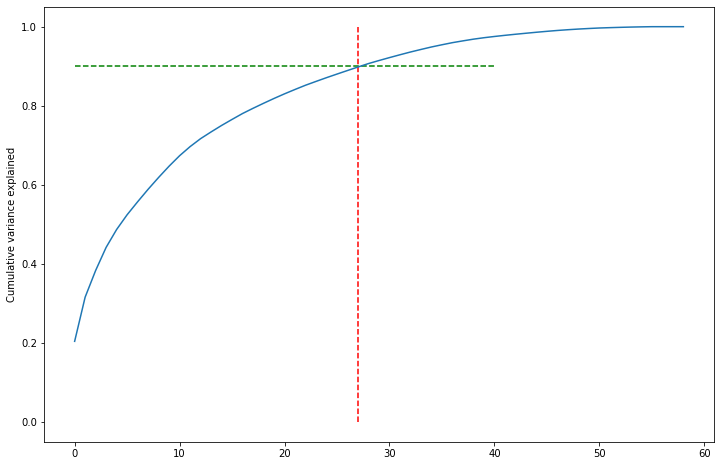

In [53]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=27, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=40, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [54]:
from sklearn.decomposition import IncrementalPCA

In [55]:
pca_final = IncrementalPCA(n_components=27)

In [56]:
df_train_pca = pca_final.fit_transform(X_train)

In [57]:
df_train_pca.shape

(125734, 27)

In [58]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [59]:
corrmat.shape

(27, 27)

<AxesSubplot:>

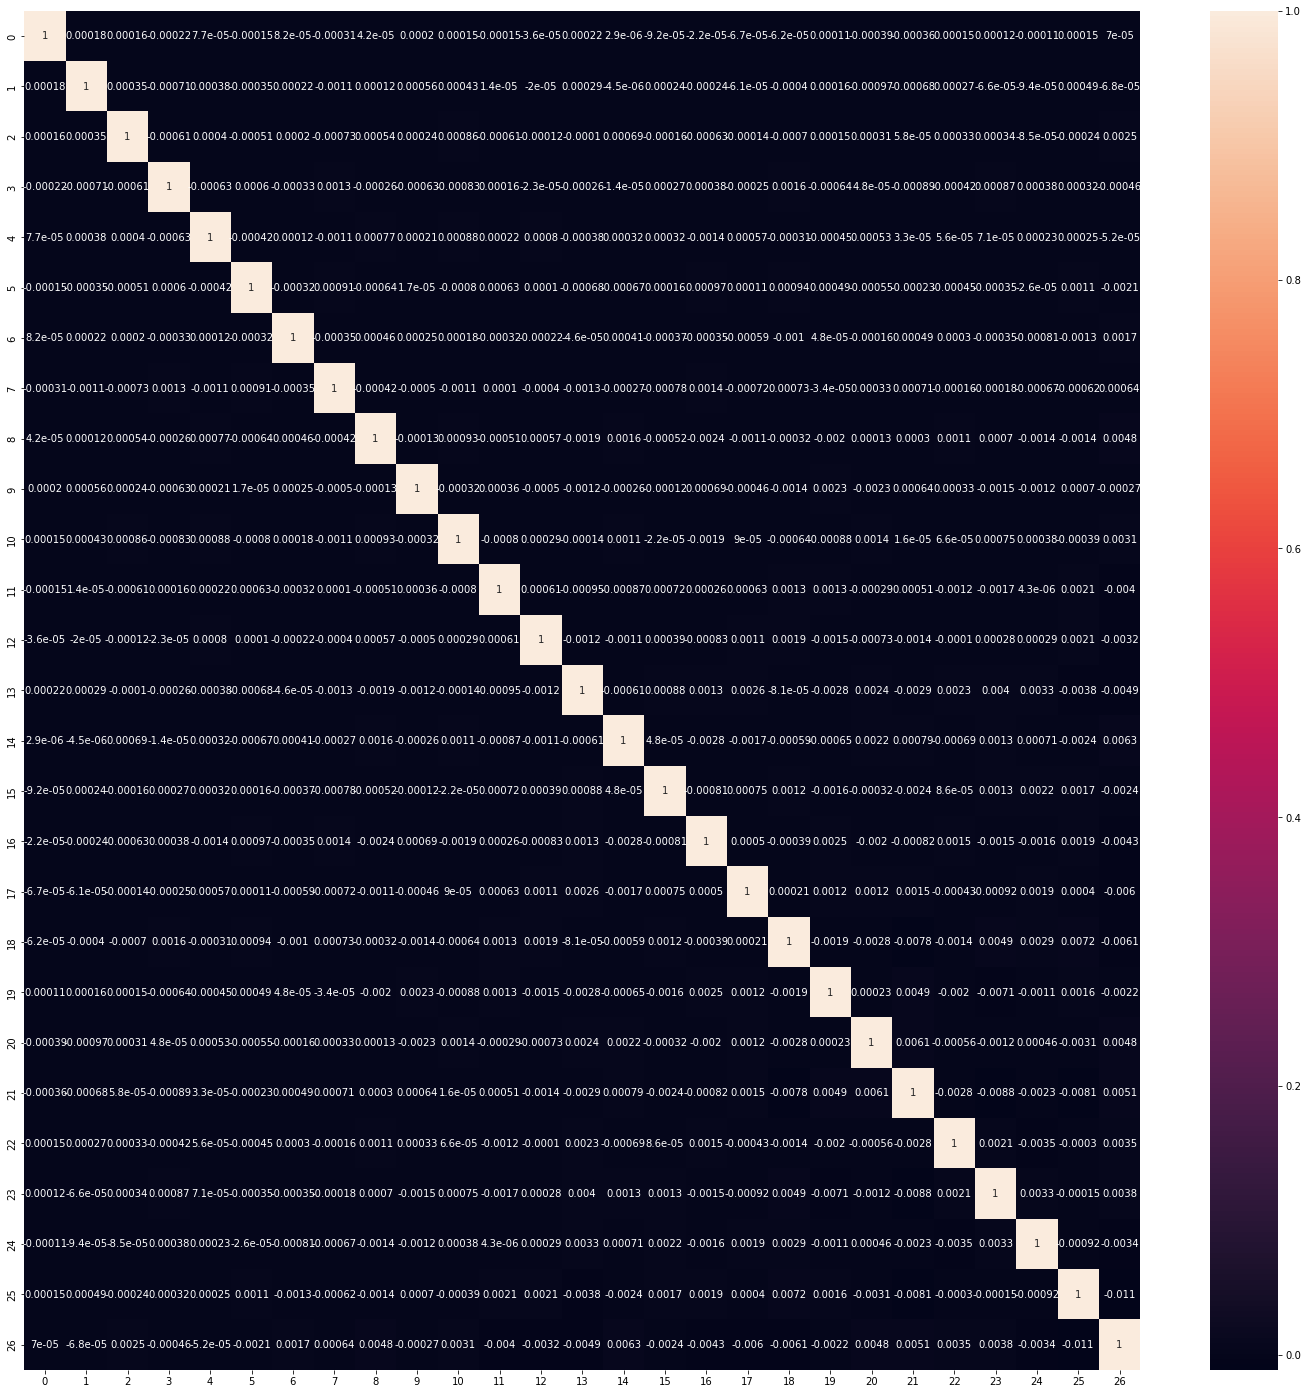

In [60]:
plt.figure(figsize=[25,25])
sns.heatmap(corrmat, annot=True)

### Observation:

  - As you can notice PCA has given us the principal components / features that are not collinear

In [61]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(30000, 27)

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
learner_pca = LogisticRegression()

In [64]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [65]:
round(model_pca.score(df_train_pca, y_train) * 100, 2)

89.66

In [66]:
def calculate_y_train_pred(y_pred):
    y_pred_df = pd.DataFrame(y_pred)
    y_pred_df = y_pred_df.iloc[:,[1]]
    y_train_df = pd.DataFrame(y_train)
    y_pred_final = pd.concat([y_train_df,y_pred_df], axis=1)
    y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
    # Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
    y_pred_final['Predicted'] = y_pred_final.Churn_Prob.apply( lambda x: 1 if x > 0.5 else 0)
    for i in range(10):
        y_pred_final[i/10]= y_pred_final.Churn_Prob.map(lambda x: 1 if (x > (i/10)) else 0)
    print(y_pred_final.head())
    return y_pred_final

In [67]:
#Calculate Y train Predicted 
y_pred = learner_pca.predict_proba(df_train_pca)
y_pred_final = calculate_y_train_pred(y_pred)

   churn_probability  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0                  0    0.042396          0    1    0    0    0    0    0   
1                  0    0.276775          0    1    1    1    0    0    0   
2                  0    0.076633          0    1    0    0    0    0    0   
3                  0    0.144526          0    1    1    0    0    0    0   
4                  0    0.172093          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0  


In [68]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [69]:
def print_score(y_pred_final):
    metric = []
    '''
    print the accuracy score and confusion matrix
    '''
    '''
    training performance
    '''
    print("Train Result:\n")
    acc_score = round(metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.Predicted), 4) * 100
    metric.append(acc_score)
    print("accuracy score: {0:.4f}\n".format(acc_score))
    confusion = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final.Predicted)
    print("Confusion Matrix: \n {}\n".format(confusion))
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    sensitivity = round(TP / float(TP+FN), 4) * 100
    print("Sensitivity: {0:.4f}\n".format(sensitivity))
    metric.append(sensitivity)

    specificity = round(TN / float(TN+FP), 4) * 100
    print("Specificity: {0:.4f}\n".format(specificity))
    metric.append(specificity)
    
    fpr = round(FP/ float(TN+FP), 4) * 100
    print("False Positive Rate : {0:.4f}\n".format(fpr))    
    metric.append(fpr)
    
    ppv= round(TP / float(TP+FP), 4)* 100
    print("Positive Predictive Value : {0:.4f}\n".format(ppv))
    metric.append(ppv)
    
    npv= round(TN / float(TN+ FN), 4) * 100
    print("Negative Predictive Value : {0:.4f}\n".format(npv))
    metric.append(npv)
    
    precision = round(TP / float(TP+ FP), 4) * 100
    print("Precision : {0:.4f}\n".format(precision))
    metric.append(precision)
    
    recall = round(TP / float(TP+ FN), 4) * 100
    print("Recall : {0:.4f}\n".format(recall))
    metric.append(recall)

    
    return metric

In [70]:
def print_cutoffmatrix(y_pred_final):
    cutoffmatrix_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity','Precision','Recall'])

    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final[i] )
        total1=sum(sum(cm))
        Accuracy = (cm[0,0] + cm[1,1]) / total1
        Specificity = cm[0,0] / (cm[0,0] + cm[0,1])
        Sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
        Precision = precision_score(y_pred_final.churn_probability, y_pred_final[i])
        Recall = recall_score(y_pred_final.churn_probability, y_pred_final[i])
        cutoffmatrix_df.loc[i] =[i, Accuracy, Sensitivity, Specificity, Precision, Recall]

    print(cutoffmatrix_df)
    plt.figure(figsize = (20, 20))
    cutoffmatrix_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
    plt.xticks(np.arange(0.0, 1.0, 0.1))
    plt.show()

Train Result:

accuracy score: 89.6600

Confusion Matrix: 
 [[57481  5386]
 [ 7616 55251]]

Sensitivity: 87.8900

Specificity: 91.4300

False Positive Rate : 8.5700

Positive Predictive Value : 91.1200

Negative Predictive Value : 88.3000

Precision : 91.1200

Recall : 87.8900



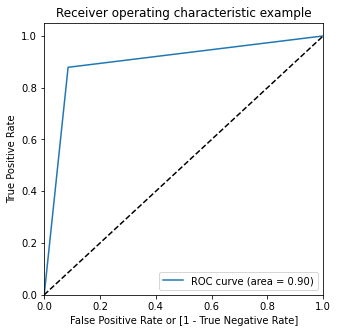

     Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.500000     1.000000     0.000000   0.500000  1.000000
0.1          0.1  0.779232     0.971432     0.587033   0.701699  0.971432
0.2          0.2  0.844871     0.945711     0.744031   0.786991  0.945711
0.3          0.3  0.874346     0.923426     0.825266   0.840885  0.923426
0.4          0.4  0.889879     0.900631     0.879126   0.881671  0.900631
0.5          0.5  0.896591     0.878855     0.914327   0.911176  0.878855
0.6          0.6  0.896846     0.856618     0.937074   0.931568  0.856618
0.7          0.7  0.891581     0.828591     0.954571   0.948023  0.828591
0.8          0.8  0.880192     0.790717     0.969666   0.963055  0.790717
0.9          0.9  0.838938     0.695802     0.982073   0.974883  0.695802


<Figure size 1440x1440 with 0 Axes>

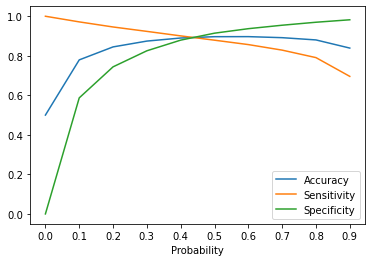

In [71]:
print_score(y_pred_final)
draw_roc(y_pred_final.churn_probability, y_pred_final.Predicted)
print_cutoffmatrix(y_pred_final)

In [72]:
## 0.10 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

churn_probability  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0                  0    0.042396          0    1    0    0    0    0    0   
1                  0    0.276775          0    1    1    1    0    0    0   
2                  0    0.076633          0    1    0    0    0    0    0   
3                  0    0.144526          0    1    1    0    0    0    0   
4                  0    0.172093          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [73]:
metric_pca = print_score(y_pred_final)

Train Result:

accuracy score: 89.2100

Confusion Matrix: 
 [[55826  7041]
 [ 6531 56336]]

Sensitivity: 89.6100

Specificity: 88.8000

False Positive Rate : 11.2000

Positive Predictive Value : 88.8900

Negative Predictive Value : 89.5300

Precision : 88.8900

Recall : 89.6100



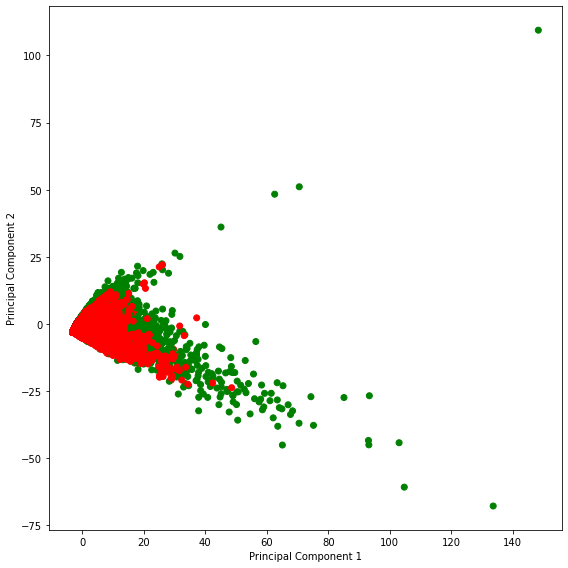

In [74]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train['churn_probability'].map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [75]:
def calculate_y_test_pred_final(y_test_pred,cutOff,modelName):
    # Convert y_test_pred to a dataframe
    y_test_pred_df = pd.DataFrame(y_test_pred)
    y_test_pred_df = y_test_pred_df.iloc[:,[1]]
    y_test_pred_final = pd.concat([data_test['id'],y_test_pred_df[1]], axis=1)
    y_test_pred_final= y_test_pred_final.rename(columns={ 1 : 'Churn_Prob'})
    y_test_pred_final['churn_probability'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > cutOff else 0)
    globals()[f"y_test_final_{modelName}"]= y_test_pred_final[['id','churn_probability']]
    fileName = "submission_"+modelName+".csv"
    globals()[f"y_test_final_{modelName}"].to_csv(fileName,index=False)
    print(y_test_pred_final['churn_probability'].sum())

In [76]:
y_test_pred = model_pca.predict_proba(df_test_pca)
calculate_y_test_pred_final(y_test_pred,0.42,"pca")

5562


In [77]:
#PCA Again

In [78]:
pca_again = PCA(0.9)
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape

(125734, 29)

In [79]:
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2, y_train)
round(model_pca2.score(df_train_pca2, y_train) * 100, 2)

89.91

In [80]:
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(30000, 29)

   churn_probability  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0                  0    0.036843          0    1    0    0    0    0    0   
1                  0    0.361523          0    1    1    1    1    0    0   
2                  0    0.067882          0    1    0    0    0    0    0   
3                  0    0.169599          0    1    1    0    0    0    0   
4                  0    0.337126          0    1    1    1    1    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0  
Train Result:

accuracy score: 89.9100

Confusion Matrix: 
 [[57583  5284]
 [ 7400 55467]]

Sensitivity: 88.2300

Specificity: 91.5900

False Positive Rate : 8.4100

Positive Predictive Value : 91.3000

Negative Predictive Value : 88.6100

Precision : 91.3000

Recall : 88.2300



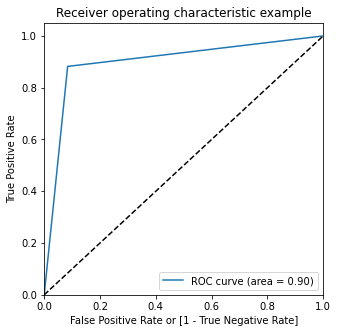

     Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.500000     1.000000     0.000000   0.500000  1.000000
0.1          0.1  0.786191     0.971161     0.601222   0.708908  0.971161
0.2          0.2  0.848840     0.946983     0.750696   0.791602  0.946983
0.3          0.3  0.878863     0.925271     0.832456   0.846686  0.925271
0.4          0.4  0.893354     0.902731     0.883977   0.886113  0.902731
0.5          0.5  0.899120     0.882291     0.915950   0.913022  0.882291
0.6          0.6  0.899057     0.860945     0.937169   0.931985  0.860945
0.7          0.7  0.894205     0.833808     0.954603   0.948365  0.833808
0.8          0.8  0.881989     0.793835     0.970143   0.963753  0.793835
0.9          0.9  0.841483     0.700638     0.982328   0.975397  0.700638


<Figure size 1440x1440 with 0 Axes>

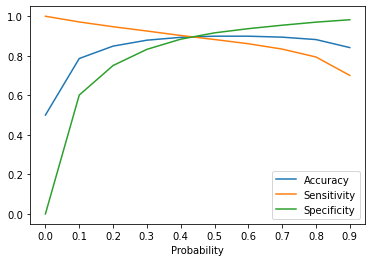

In [81]:
y_pred = learner_pca2.predict_proba(df_train_pca2)
y_pred_final = calculate_y_train_pred(y_pred)
print_score(y_pred_final)
draw_roc(y_pred_final.churn_probability, y_pred_final.Predicted)
print_cutoffmatrix(y_pred_final)

In [82]:
## 0.42 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.42 else 0)
print(y_pred_final.head())
metric_pca2 = print_score(y_pred_final)

   churn_probability  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0                  0    0.036843          0    1    0    0    0    0    0   
1                  0    0.361523          0    1    1    1    1    0    0   
2                  0    0.067882          0    1    0    0    0    0    0   
3                  0    0.169599          0    1    1    0    0    0    0   
4                  0    0.337126          0    1    1    1    1    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0  
Train Result:

accuracy score: 89.5000

Confusion Matrix: 
 [[56043  6824]
 [ 6373 56494]]

Sensitivity: 89.8600

Specificity: 89.1500

False Positive Rate : 10.8500

Positive Predictive Value : 89.2200

Negative Predictive Value : 89.7900

Precision : 89.2200

Recall : 89.8600



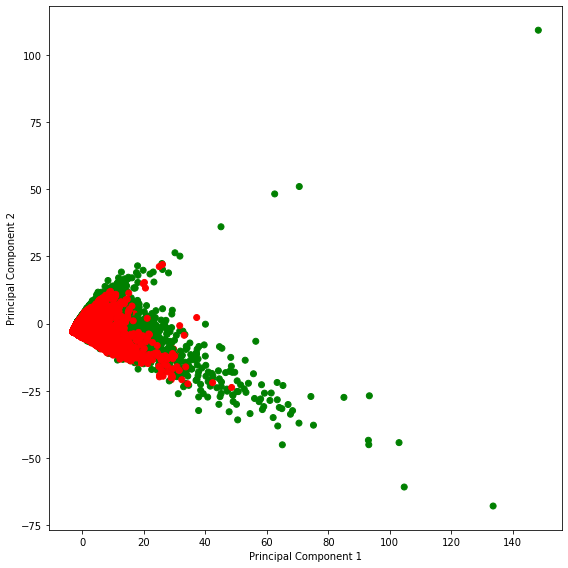

In [83]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca2[:,0], df_train_pca2[:,1], c = y_train['churn_probability'].map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [84]:
y_test_pred = model_pca2.predict_proba(df_test_pca2)
calculate_y_test_pred_final(y_test_pred,0.42,"pca2")

5412


In [85]:
def print_classification_score(clf, X_train, y_train,train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        #res = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
        #print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        #print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
 

### Observation:

   - The accuracy score is very close to what was provided by the sample.csv file.
   - Hence we cannot proceed with this model even though 89% is a good score.

### Model building with Decision tree

In [86]:
#Decision Tree

In [87]:
clf = DecisionTreeClassifier(random_state=42,max_depth=5)
clf.fit(X_train, y_train)
print_classification_score(clf, X_train, y_train,True)

Train Result:

accuracy score: 0.8960

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     62867
           1       0.92      0.86      0.89     62867

    accuracy                           0.90    125734
   macro avg       0.90      0.90      0.90    125734
weighted avg       0.90      0.90      0.90    125734


Confusion Matrix: 
 [[58455  4412]
 [ 8665 54202]]



   churn_probability  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0                  0    0.237851          0    1    1    1    0    0    0   
1                  0    0.237851          0    1    1    1    0    0    0   
2                  0    0.237851          0    1    1    1    0    0    0   
3                  0    0.540759          1    1    1    1    1    1    1   
4                  0    0.347185          0    1    1    1    1    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0  
Train Result:

accuracy score: 89.6000

Confusion Matrix: 
 [[58455  4412]
 [ 8665 54202]]

Sensitivity: 86.2200

Specificity: 92.9800

False Positive Rate : 7.0200

Positive Predictive Value : 92.4700

Negative Predictive Value : 87.0900

Precision : 92.4700

Recall : 86.2200



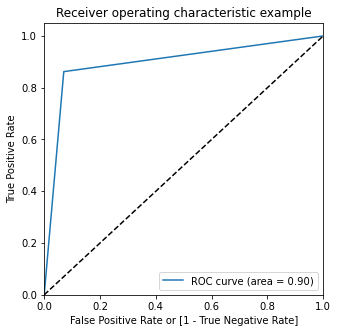

     Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.500000     1.000000     0.000000   0.500000  1.000000
0.1          0.1  0.815348     0.943420     0.687276   0.751045  0.943420
0.2          0.2  0.855449     0.925541     0.785356   0.811747  0.925541
0.3          0.3  0.881488     0.900997     0.861978   0.867162  0.900997
0.4          0.4  0.895995     0.863028     0.928961   0.923947  0.863028
0.5          0.5  0.895995     0.862169     0.929820   0.924728  0.862169
0.6          0.6  0.894468     0.838834     0.950101   0.943854  0.838834
0.7          0.7  0.882697     0.786804     0.978590   0.973509  0.786804
0.8          0.8  0.877495     0.771709     0.983282   0.978796  0.771709
0.9          0.9  0.874855     0.765250     0.984459   0.980096  0.765250


<Figure size 1440x1440 with 0 Axes>

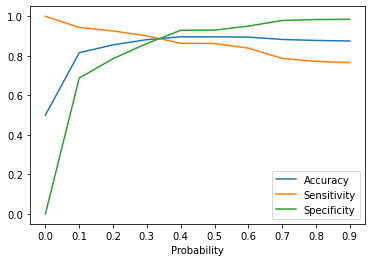

In [88]:
y_pred = clf.predict_proba(X_train)
y_pred_final = calculate_y_train_pred(y_pred)
print_score(y_pred_final)
draw_roc(y_pred_final.churn_probability, y_pred_final.Predicted)
print_cutoffmatrix(y_pred_final)

In [89]:
## 0.38 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.38 else 0)
print(y_pred_final.head())
metric_dt = print_score(y_pred_final)

   churn_probability  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0                  0    0.237851          0    1    1    1    0    0    0   
1                  0    0.237851          0    1    1    1    0    0    0   
2                  0    0.237851          0    1    1    1    0    0    0   
3                  0    0.540759          1    1    1    1    1    1    1   
4                  0    0.347185          0    1    1    1    1    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0  
Train Result:

accuracy score: 89.0700

Confusion Matrix: 
 [[56672  6195]
 [ 7547 55320]]

Sensitivity: 88.0000

Specificity: 90.1500

False Positive Rate : 9.8500

Positive Predictive Value : 89.9300

Negative Predictive Value : 88.2500

Precision : 89.9300

Recall : 88.0000



In [90]:
y_test_pred = clf.predict_proba(X_test)
calculate_y_test_pred_final(y_test_pred,0.38,"dt")

5103


### Observation:

   - The accuracy score from decision tree is not very different from Logistic regression.
   - Hence we cannot proceed with this model even though 89% is a good score.

### Modelling with Bagging classifier

In [91]:
#bagging classifier

In [92]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=100,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)
bag_clf.fit(X_train, y_train)
print_classification_score(bag_clf, X_train, y_train,True)

Train Result:

accuracy score: 0.9081

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     62867
           1       0.96      0.86      0.90     62867

    accuracy                           0.91    125734
   macro avg       0.91      0.91      0.91    125734
weighted avg       0.91      0.91      0.91    125734


Confusion Matrix: 
 [[60386  2481]
 [ 9072 53795]]



   churn_probability  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0                  0    0.168544          0    1    1    0    0    0    0   
1                  0    0.169258          0    1    1    0    0    0    0   
2                  0    0.169117          0    1    1    0    0    0    0   
3                  0    0.454648          0    1    1    1    1    1    0   
4                  0    0.317054          0    1    1    1    1    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0  
Train Result:

accuracy score: 90.8100

Confusion Matrix: 
 [[60386  2481]
 [ 9072 53795]]

Sensitivity: 85.5700

Specificity: 96.0500

False Positive Rate : 3.9500

Positive Predictive Value : 95.5900

Negative Predictive Value : 86.9400

Precision : 95.5900

Recall : 85.5700



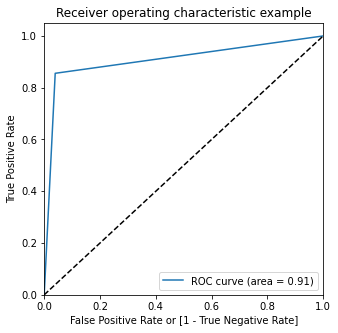

     Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.500000     1.000000     0.000000   0.500000  1.000000
0.1          0.1  0.712767     0.978781     0.446753   0.638879  0.978781
0.2          0.2  0.864420     0.933526     0.795314   0.820169  0.933526
0.3          0.3  0.896854     0.909491     0.884216   0.887070  0.909491
0.4          0.4  0.907193     0.888304     0.926082   0.923180  0.888304
0.5          0.5  0.908116     0.855695     0.960536   0.955914  0.855695
0.6          0.6  0.896003     0.818156     0.973850   0.969027  0.818156
0.7          0.7  0.883436     0.788251     0.978622   0.973595  0.788251
0.8          0.8  0.880899     0.782127     0.979671   0.974667  0.782127
0.9          0.9  0.858320     0.727043     0.989597   0.985893  0.727043


<Figure size 1440x1440 with 0 Axes>

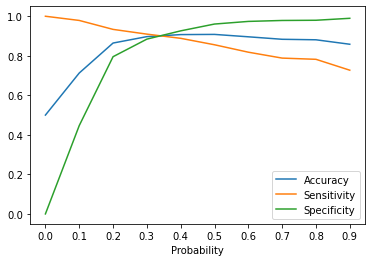

In [93]:
y_pred = bag_clf.predict_proba(X_train)
y_pred_final = calculate_y_train_pred(y_pred)
print_score(y_pred_final)
draw_roc(y_pred_final.churn_probability, y_pred_final.Predicted)
print_cutoffmatrix(y_pred_final)

In [94]:
## 0.38 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.38 else 0)
print(y_pred_final.head())
metric_bag_clf = print_score(y_pred_final)

   churn_probability  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0                  0    0.168544          0    1    1    0    0    0    0   
1                  0    0.169258          0    1    1    0    0    0    0   
2                  0    0.169117          0    1    1    0    0    0    0   
3                  0    0.454648          1    1    1    1    1    1    0   
4                  0    0.317054          0    1    1    1    1    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0  
Train Result:

accuracy score: 90.5800

Confusion Matrix: 
 [[57790  5077]
 [ 6768 56099]]

Sensitivity: 89.2300

Specificity: 91.9200

False Positive Rate : 8.0800

Positive Predictive Value : 91.7000

Negative Predictive Value : 89.5200

Precision : 91.7000

Recall : 89.2300



In [95]:
y_test_pred = bag_clf.predict_proba(X_test)
calculate_y_test_pred_final(y_test_pred,0.42,"bag_clf")

4171


### Observation:

   - The accuracy score has increased to 90.58 which is better than the previous models
   - Let us hypertune this and see if we get a better score

0.9052841713458571
Train Result:

accuracy score: 0.9081

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     62867
           1       0.96      0.86      0.90     62867

    accuracy                           0.91    125734
   macro avg       0.91      0.91      0.91    125734
weighted avg       0.91      0.91      0.91    125734


Confusion Matrix: 
 [[60386  2481]
 [ 9072 53795]]

   churn_probability  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0                  0    0.168544          0    1    1    0    0    0    0   
1                  0    0.169258          0    1    1    0    0    0    0   
2                  0    0.169117          0    1    1    0    0    0    0   
3                  0    0.454648          0    1    1    1    1    1    0   
4                  0    0.317054          0    1    1    1    1    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2 

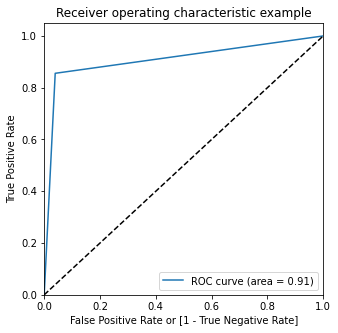

     Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.500000     1.000000     0.000000   0.500000  1.000000
0.1          0.1  0.712767     0.978781     0.446753   0.638879  0.978781
0.2          0.2  0.864420     0.933526     0.795314   0.820169  0.933526
0.3          0.3  0.896854     0.909491     0.884216   0.887070  0.909491
0.4          0.4  0.907193     0.888304     0.926082   0.923180  0.888304
0.5          0.5  0.908116     0.855695     0.960536   0.955914  0.855695
0.6          0.6  0.896003     0.818156     0.973850   0.969027  0.818156
0.7          0.7  0.883436     0.788251     0.978622   0.973595  0.788251
0.8          0.8  0.880899     0.782127     0.979671   0.974667  0.782127
0.9          0.9  0.858320     0.727043     0.989597   0.985893  0.727043


<Figure size 1440x1440 with 0 Axes>

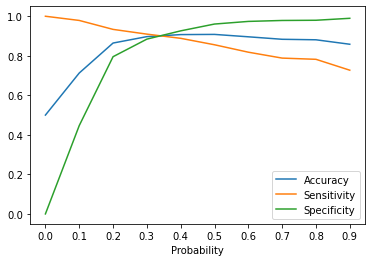

In [96]:
#oob_score=True
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=100,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
print(bag_clf.oob_score_)
print_classification_score(bag_clf, X_train, y_train,train=True)
y_pred = bag_clf.predict_proba(X_train)
y_pred_final = calculate_y_train_pred(y_pred)
print_score(y_pred_final)
draw_roc(y_pred_final.churn_probability, y_pred_final.Predicted)
print_cutoffmatrix(y_pred_final)

In [97]:
## 0.38 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.38 else 0)
print(y_pred_final.head())
metric_bag_clf_oob = print_score(y_pred_final)

   churn_probability  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0                  0    0.168544          0    1    1    0    0    0    0   
1                  0    0.169258          0    1    1    0    0    0    0   
2                  0    0.169117          0    1    1    0    0    0    0   
3                  0    0.454648          1    1    1    1    1    1    0   
4                  0    0.317054          0    1    1    1    1    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0  
Train Result:

accuracy score: 90.5800

Confusion Matrix: 
 [[57790  5077]
 [ 6768 56099]]

Sensitivity: 89.2300

Specificity: 91.9200

False Positive Rate : 8.0800

Positive Predictive Value : 91.7000

Negative Predictive Value : 89.5200

Precision : 91.7000

Recall : 89.2300



In [98]:
y_test_pred = bag_clf.predict_proba(X_test)
calculate_y_test_pred_final(y_test_pred,0.38,"bag_clf_oob")

4618


### Observation:

   - The accuracy score has increased further to 90.81 which is better than the previous models
   - However let us check other models to see if we get a better score.

### Model building with XGBoost

In [99]:
#XGBoost

In [100]:
!pip install xgboost

In [101]:
import xgboost as xgb

Train Result:

accuracy score: 0.9975

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     62867
           1       1.00      1.00      1.00     62867

    accuracy                           1.00    125734
   macro avg       1.00      1.00      1.00    125734
weighted avg       1.00      1.00      1.00    125734


Confusion Matrix: 
 [[62708   159]
 [  152 62715]]

   churn_probability  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0                  0    0.001329          0    1    0    0    0    0    0   
1                  0    0.010101          0    1    0    0    0    0    0   
2                  0    0.002356          0    1    0    0    0    0    0   
3                  0    0.022738          0    1    0    0    0    0    0   
4                  0    0.001199          0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0

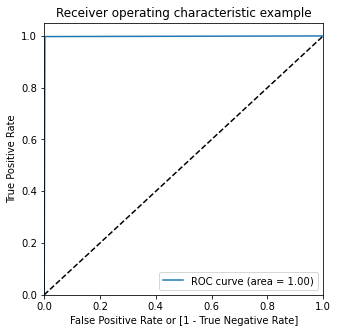

     Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.500000     1.000000     0.000000   0.500000  1.000000
0.1          0.1  0.980538     0.999968     0.961108   0.962563  0.999968
0.2          0.2  0.992428     0.999745     0.985111   0.985326  0.999745
0.3          0.3  0.995832     0.999411     0.992253   0.992309  0.999411
0.4          0.4  0.997256     0.998871     0.995642   0.995656  0.998871
0.5          0.5  0.997527     0.997582     0.997471   0.997471  0.997582
0.6          0.6  0.996866     0.995133     0.998600   0.998595  0.995133
0.7          0.7  0.994870     0.990377     0.999364   0.999358  0.990377
0.8          0.8  0.989343     0.979003     0.999682   0.999675  0.979003
0.9          0.9  0.973945     0.947954     0.999936   0.999933  0.947954


<Figure size 1440x1440 with 0 Axes>

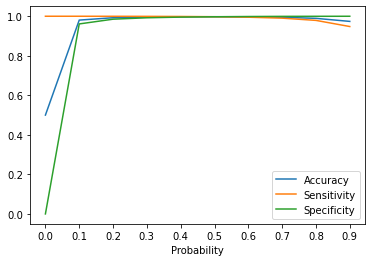

In [102]:
xgb_clf = xgb.XGBClassifier(max_depth=7, n_estimators=300, learning_rate=0.3,
                            n_jobs=-1, verbosity=1, gpu_id=0)
xgb_clf.fit(X_train, y_train)
print_classification_score(xgb_clf, X_train, y_train,train=True)
y_pred = xgb_clf.predict_proba(X_train)
y_pred_final = calculate_y_train_pred(y_pred)
print_score(y_pred_final)
draw_roc(y_pred_final.churn_probability, y_pred_final.Predicted)
print_cutoffmatrix(y_pred_final)

In [103]:
## 0.1 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)
metric_xgb = print_score(y_pred_final)

Train Result:

accuracy score: 98.0500

Confusion Matrix: 
 [[60422  2445]
 [    2 62865]]

Sensitivity: 100.0000

Specificity: 96.1100

False Positive Rate : 3.8900

Positive Predictive Value : 96.2600

Negative Predictive Value : 100.0000

Precision : 96.2600

Recall : 100.0000



In [104]:
y_test_pred = xgb_clf.predict_proba(X_test)
calculate_y_test_pred_final(y_test_pred,0.1,"xgb")

3698


### Observation:
  - XGBoost gave a very good accuracy score of 98.05 as train score but got a very low score on kaggle.
  - Hence we are continuing with other models

### Model building with Logistic regression and RFE

In [105]:
#Logistic Regression

In [106]:
logreg= LogisticRegression()

In [107]:
from sklearn.feature_selection import RFE

rfe = RFE(logreg,step=20,n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))
col = X_train.columns[rfe.support_]

print(col)

Index(['total_og_mou_7', 'total_ic_mou_7', 'total_ic_mou_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'total_data_rech_amt_6',
       'total_data_rech_amt_7', 'total_data_rech_amt_8', 'total_rech_6',
       'total_rech_7', 'total_rech_8', 'roam_7', 'local_6', 'local_7',
       'local_8', 'spl_8'],
      dtype='object')


In [108]:
X_train_sm = smt.add_constant(X_train[col])
X_test_sm = smt.add_constant(X_test[col])
logm2 = smt.GLM(y_train,X_train_sm, family = smt.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      churn_probability   No. Observations:               125734
Model:                            GLM   Df Residuals:                   125713
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13650.
Date:                Wed, 11 May 2022   Deviance:                       27300.
Time:                        18:33:47   Pearson chi2:                 4.63e+06
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.721e+

In [109]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features          VIF
14           total_rech_8  15473548.72
13           total_rech_7  14269558.73
12           total_rech_6  12028516.54
11  total_data_rech_amt_8  10479285.99
10  total_data_rech_amt_7   9432535.93
9   total_data_rech_amt_6   7503485.09
3        total_rech_amt_6   2914918.43
4        total_rech_amt_7   2705590.35
5        total_rech_amt_8   2700164.58
2          total_ic_mou_8         3.09
18                local_8         2.95
1          total_ic_mou_7         2.89
0          total_og_mou_7         2.08
17                local_7         2.05
19                  spl_8         1.87
7             sachet_2g_8         1.64
16                local_6         1.46
8            monthly_3g_8         1.40
6            monthly_2g_8         1.07
15                 roam_7         1.04

In [110]:
#function to generate model and VIF details

def generateModel(X,field):
    X_train_new = X.drop(field,axis=1)
    # create another model
    X_train_lm = smt.add_constant(X_train_new)
    #create model
    logm2 = smt.GLM(y_train,X_train_lm, family = smt.families.Binomial())
    lr_model = logm2.fit()
    #params
    print(lr_model.summary())
    #Calculate the VIFs for the new model    
    vif = pd.DataFrame()
    X_vif = X_train_new;
    vif['Features'] = X_vif.columns
    vif['VIF'] = [variance_inflation_factor(X_vif.values,i) for i in range(X_vif.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = "VIF", ascending=False)
    print(vif)
    return X_train_new,X_train_lm,lr_model

In [111]:
X_train_sm.drop('const',axis=1,inplace=True)
X_train_new,X_train_lm,lr_model = generateModel(X_train_sm,'total_rech_8')

                 Generalized Linear Model Regression Results                  
Dep. Variable:      churn_probability   No. Observations:               125734
Model:                            GLM   Df Residuals:                   125714
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13969.
Date:                Wed, 11 May 2022   Deviance:                       27938.
Time:                        18:34:07   Pearson chi2:                 2.84e+06
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.005e+

In [112]:
X_train_new,X_train_lm,lr_model = generateModel(X_train_new,'total_rech_6')

                 Generalized Linear Model Regression Results                  
Dep. Variable:      churn_probability   No. Observations:               125734
Model:                            GLM   Df Residuals:                   125715
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15591.
Date:                Wed, 11 May 2022   Deviance:                       31183.
Time:                        18:34:25   Pearson chi2:                 2.18e+06
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.249e+

In [113]:
X_train_new,X_train_lm,lr_model = generateModel(X_train_new,'total_rech_7')

                 Generalized Linear Model Regression Results                  
Dep. Variable:      churn_probability   No. Observations:               125734
Model:                            GLM   Df Residuals:                   125716
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34362.
Date:                Wed, 11 May 2022   Deviance:                       68725.
Time:                        18:34:31   Pearson chi2:                 1.18e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [114]:
X_train_new,X_train_lm,lr_model = generateModel(X_train_new,'total_data_rech_amt_6')

                 Generalized Linear Model Regression Results                  
Dep. Variable:      churn_probability   No. Observations:               125734
Model:                            GLM   Df Residuals:                   125717
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34363.
Date:                Wed, 11 May 2022   Deviance:                       68726.
Time:                        18:34:35   Pearson chi2:                 1.18e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [115]:
X_train_new,X_train_lm,lr_model = generateModel(X_train_new,'total_data_rech_amt_8')

                 Generalized Linear Model Regression Results                  
Dep. Variable:      churn_probability   No. Observations:               125734
Model:                            GLM   Df Residuals:                   125718
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34365.
Date:                Wed, 11 May 2022   Deviance:                       68729.
Time:                        18:34:38   Pearson chi2:                 1.17e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

Train Result:

accuracy score: 89.5700

Confusion Matrix: 
 [[59636  3231]
 [ 9877 52990]]

Sensitivity: 84.2900

Specificity: 94.8600

False Positive Rate : 5.1400

Positive Predictive Value : 94.2500

Negative Predictive Value : 85.7900

Precision : 94.2500

Recall : 84.2900



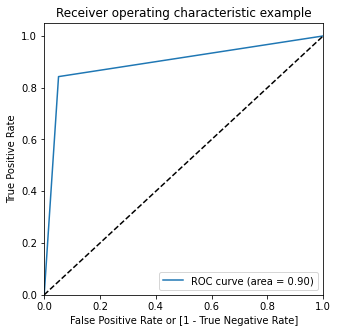

     Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.500000     1.000000     0.000000   0.500000  1.000000
0.1          0.1  0.717061     0.977588     0.456535   0.642705  0.977588
0.2          0.2  0.837625     0.939953     0.735298   0.780268  0.939953
0.3          0.3  0.880979     0.909110     0.852848   0.860686  0.909110
0.4          0.4  0.897896     0.869773     0.926018   0.921609  0.869773
0.5          0.5  0.895748     0.842891     0.948606   0.942530  0.842891
0.6          0.6  0.891000     0.821464     0.960536   0.954161  0.821464
0.7          0.7  0.885600     0.803872     0.967328   0.960944  0.803872
0.8          0.8  0.880955     0.789826     0.972084   0.965862  0.789826
0.9          0.9  0.863498     0.746401     0.980594   0.974659  0.746401


<Figure size 1440x1440 with 0 Axes>

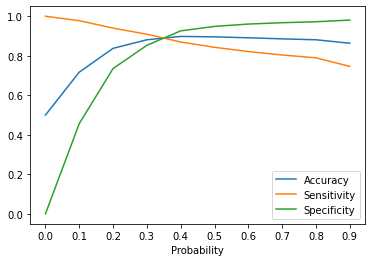

In [116]:
y_pred = lr_model.predict(X_train_lm).values.reshape(-1)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = y_pred_df.iloc[:,[0]]
y_train_df = pd.DataFrame(y_train)
y_pred_final = pd.concat([y_train_df,y_pred_df], axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.apply( lambda x: 1 if x > 0.5 else 0)
for i in range(10):
    y_pred_final[i/10]= y_pred_final.Churn_Prob.map(lambda x: 1 if (x > (i/10)) else 0)

print_score(y_pred_final)
draw_roc(y_pred_final.churn_probability, y_pred_final.Predicted)
print_cutoffmatrix(y_pred_final)

In [117]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = y_pred_df.iloc[:,[0]]
## 0.38 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.38 else 0)
metric_log = print_score(y_pred_final)

Train Result:

accuracy score: 89.7500

Confusion Matrix: 
 [[57715  5152]
 [ 7742 55125]]

Sensitivity: 87.6900

Specificity: 91.8000

False Positive Rate : 8.2000

Positive Predictive Value : 91.4500

Negative Predictive Value : 88.1700

Precision : 91.4500

Recall : 87.6900



In [118]:
X_test_new = X_test[X_train_new.columns]
X_test_sm = smt.add_constant(X_test_new)
y_test_pred = lr_model.predict(X_test_sm).values.reshape(-1)
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df = y_test_pred_df.iloc[:,[0]]
y_test_pred_final = pd.concat([X_test['id'],y_test_pred_df[0]], axis=1)
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Churn_Prob'})
y_test_pred_final['churn_probability'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.38 else 0)
y_test_final_log = y_test_pred_final[['id','churn_probability']]
y_test_final_log.to_csv('submission_log.csv',index=False)

### Observation
  - Again we couldn't get a good train score or kaggle score with Logistic regression with various parameter tuning
  - Need to explore other models

### Model building with Random Forest

   - The parameters specified below are taken after checking for the various values with parameter tuning.
   - That code is not added to this file here as they take a long time to run.

In [119]:
#Random forest

   churn_probability  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0                  0    0.057313          0    1    0    0    0    0    0   
1                  0    0.112782          0    1    1    0    0    0    0   
2                  0    0.064848          0    1    0    0    0    0    0   
3                  0    0.176002          0    1    1    0    0    0    0   
4                  0    0.077322          0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0  
Train Result:

accuracy score: 96.2600

Confusion Matrix: 
 [[61367  1500]
 [ 3208 59659]]

Sensitivity: 94.9000

Specificity: 97.6100

False Positive Rate : 2.3900

Positive Predictive Value : 97.5500

Negative Predictive Value : 95.0300

Precision : 97.5500

Recall : 94.9000



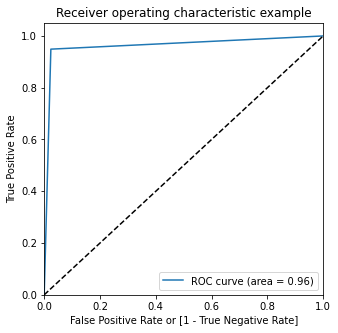

     Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.500000     1.000000     0.000000   0.500000  1.000000
0.1          0.1  0.877177     0.999491     0.754863   0.803044  0.999491
0.2          0.2  0.945576     0.995339     0.895812   0.905243  0.995339
0.3          0.3  0.964751     0.985875     0.943627   0.945912  0.985875
0.4          0.4  0.967240     0.970143     0.964337   0.964543  0.970143
0.5          0.5  0.962556     0.948972     0.976140   0.975474  0.948972
0.6          0.6  0.953577     0.923442     0.983712   0.982667  0.923442
0.7          0.7  0.940684     0.891803     0.989565   0.988435  0.891803
0.8          0.8  0.923760     0.852832     0.994687   0.993809  0.852832
0.9          0.9  0.892074     0.786311     0.997837   0.997256  0.786311


<Figure size 1440x1440 with 0 Axes>

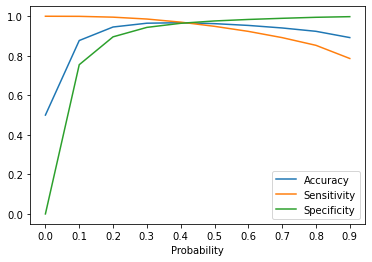

In [120]:
rf = RandomForestClassifier(max_depth=18,
                             max_features=40,
                             min_samples_leaf=10,
                             min_samples_split=20,
                             n_estimators=200,
                             n_jobs = -1)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_train)
y_pred_final = calculate_y_train_pred(y_pred)
print_score(y_pred_final)
draw_roc(y_pred_final.churn_probability, y_pred_final.Predicted)
print_cutoffmatrix(y_pred_final)

In [121]:
## 0.42 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.42 else 0)
metric_rf = print_score(y_pred_final)

Train Result:

accuracy score: 96.6900

Confusion Matrix: 
 [[60810  2057]
 [ 2108 60759]]

Sensitivity: 96.6500

Specificity: 96.7300

False Positive Rate : 3.2700

Positive Predictive Value : 96.7300

Negative Predictive Value : 96.6500

Precision : 96.7300

Recall : 96.6500



In [122]:
y_test_pred = rf.predict_proba(X_test)
calculate_y_test_pred_final(y_test_pred,0.42,"rf")

3606


In [123]:
print(rf.feature_importances_)
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)

[8.53171329e-03 4.68427734e-03 8.25145765e-03 5.14034842e-03
 1.06551509e-02 1.79625101e-02 1.12114421e-02 1.78631232e-02
 1.40345206e-02 6.26291769e-02 3.32490085e-03 4.81451251e-03
 4.58762279e-03 9.35501641e-03 1.75009128e-02 2.97794813e-02
 5.59307070e-04 6.62333483e-04 5.28726285e-04 8.32918010e-04
 1.57329537e-03 6.16174883e-04 2.53498636e-05 1.94306430e-05
 6.52617489e-06 2.71249379e-04 2.95957319e-04 1.04373177e-03
 2.07051289e-04 3.85339469e-04 1.11971767e-03 1.11934769e-04
 1.99645363e-04 1.39037523e-03 7.51073662e-05 7.25493751e-05
 3.91085128e-04 1.42724537e-02 1.13496771e-03 1.47037030e-03
 5.64013376e-03 3.42415593e-03 3.75203335e-03 9.16122044e-03
 1.59403182e-03 9.92989472e-03 1.85385574e-02 1.44489824e-02
 4.17928188e-03 5.32995116e-01 2.19651490e-03 1.14122042e-03
 8.92045523e-02 1.94775827e-03 1.70323556e-03 3.61103780e-02
 1.03726045e-03 1.81703348e-03 3.58687418e-03]


Varname       Imp
49                local_8  0.532995
52                  std_8  0.089205
9          total_ic_mou_8  0.062629
55                  spl_8  0.036110
15     last_day_rch_amt_8  0.029779
46                 roam_8  0.018539
5          total_og_mou_7  0.017963
7          total_ic_mou_6  0.017863
14     last_day_rch_amt_7  0.017501
47                local_6  0.014449
37                    aon  0.014272
8          total_ic_mou_7  0.014035
6          total_og_mou_8  0.011211
4          total_og_mou_6  0.010655
45                 roam_7  0.009930
13     last_day_rch_amt_6  0.009355
43           total_rech_8  0.009161
0                      id  0.008532
2                  arpu_7  0.008251
40  total_data_rech_amt_8  0.005640
3                  arpu_8  0.005140
11       total_rech_amt_7  0.004815
1                  arpu_6  0.004684
12       total_rech_amt_8  0.004588
48                local_7  0.004179
42           total_rech_7  0.003752
58            data_used_8  0.003587
41           total_rech_6  0.003424
10       total_rech_amt_6  0.003325
50                  std_6  0.002197
53                  spl_6  0.001948
57            data_used_7  0.001817
54                  spl_7  0.001703
44                 roam_6  0.001594
20              arpu_2g_7  0.001573
39  total_data_rech_amt_7  0.001470
33           monthly_3g_8  0.001390
51                  std_7  0.001141
38  total_data_rech_amt_6  0.001135
30            sachet_2g_8  0.001120
27           monthly_2g_8  0.001044
56            data_used_6  0.001037
19              arpu_2g_6  0.000833
17              arpu_3g_7  0.000662
21              arpu_2g_8  0.000616
16              arpu_3g_6  0.000559
18              arpu_3g_8  0.000529
36            sachet_3g_8  0.000391
29            sachet_2g_7  0.000385
26           monthly_2g_7  0.000296
25           monthly_2g_6  0.000271
28            sachet_2g_6  0.000207
32           monthly_3g_7  0.000200
31           monthly_3g_6  0.000112
34            sachet_3g_6  0.000075
35            sachet_3g_7  0.000073
22       night_pck_user_6  0.000025
23       night_pck_user_7  0.000019
24       night_pck_user_8  0.000007

In [124]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [20],
    'min_samples_leaf': [5],
    'n_estimators': [50]
}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
rf_best = grid_search.best_estimator_
print(rf_best)
print(rf_best.feature_importances_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/priyeshshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/priyeshshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/priyeshshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/priyeshshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_s

0.7541693825433311
RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)
[8.34735559e-03 8.50272908e-03 1.21080520e-02 4.08905791e-02
 1.18382536e-02 2.22207117e-02 6.01187672e-02 1.27601939e-02
 1.56067472e-02 8.79192062e-02 7.92566625e-03 8.86028457e-03
 5.04867350e-02 1.08496357e-02 1.44451044e-02 3.23023394e-02
 1.15851087e-03 1.53879386e-03 1.83272544e-03 1.91193631e-03
 2.64320600e-03 2.07367317e-03 9.08531413e-05 9.63015342e-05
 5.22357589e-05 8.73392253e-04 1.05557874e-03 2.22362811e-03
 7.67452785e-04 1.11135452e-03 1.92508107e-03 3.65248830e-04
 3.50138443e-04 1.39603888e-03 1.83780900e-04 2.52533397e-04
 3.46457160e-04 1.67805345e-02 2.59369195e-03 4.15652326e-03
 1.40236156e-02 8.05645569e-03 1.30394454e-02 3.84230093e-02
 3.13947916e-03 5.53274712e-03 1.66953254e-02 1.96042418e-02
 3.55369762e-02 1.46603410e-01 4.63758266e-03 1.15574027e-02
 1.26258286e-01 5.67543519e-03 1.32533646e-02 7.47272056e-02
 2

In [125]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
49                local_8  0.146603
52                  std_8  0.126258
9          total_ic_mou_8  0.087919
55                  spl_8  0.074727
6          total_og_mou_8  0.060119
12       total_rech_amt_8  0.050487
3                  arpu_8  0.040891
43           total_rech_8  0.038423
48                local_7  0.035537
15     last_day_rch_amt_8  0.032302
5          total_og_mou_7  0.022221
47                local_6  0.019604
37                    aon  0.016781
46                 roam_8  0.016695
8          total_ic_mou_7  0.015607
14     last_day_rch_amt_7  0.014445
40  total_data_rech_amt_8  0.014024
54                  spl_7  0.013253
42           total_rech_7  0.013039
7          total_ic_mou_6  0.012760
2                  arpu_7  0.012108
4          total_og_mou_6  0.011838
51                  std_7  0.011557
13     last_day_rch_amt_6  0.010850
11       total_rech_amt_7  0.008860
1                  arpu_6  0.008503
0                      id  0.008347
41           total_rech_6  0.008056
10       total_rech_amt_6  0.007926
58            data_used_8  0.006739
53                  spl_6  0.005675
45                 roam_7  0.005533
50                  std_6  0.004638
39  total_data_rech_amt_7  0.004157
57            data_used_7  0.003230
44                 roam_6  0.003139
20              arpu_2g_7  0.002643
38  total_data_rech_amt_6  0.002594
56            data_used_6  0.002305
27           monthly_2g_8  0.002224
21              arpu_2g_8  0.002074
30            sachet_2g_8  0.001925
19              arpu_2g_6  0.001912
18              arpu_3g_8  0.001833
17              arpu_3g_7  0.001539
33           monthly_3g_8  0.001396
16              arpu_3g_6  0.001159
29            sachet_2g_7  0.001111
26           monthly_2g_7  0.001056
25           monthly_2g_6  0.000873
28            sachet_2g_6  0.000767
31           monthly_3g_6  0.000365
32           monthly_3g_7  0.000350
36            sachet_3g_8  0.000346
35            sachet_3g_7  0.000253
34            sachet_3g_6  0.000184
23       night_pck_user_7  0.000096
22       night_pck_user_6  0.000091
24       night_pck_user_8  0.000052

   churn_probability  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0                  0    0.078621          0    1    0    0    0    0    0   
1                  0    0.165145          0    1    1    0    0    0    0   
2                  0    0.048969          0    1    0    0    0    0    0   
3                  0    0.171927          0    1    1    0    0    0    0   
4                  0    0.065924          0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0  
Train Result:

accuracy score: 96.7900

Confusion Matrix: 
 [[61512  1355]
 [ 2681 60186]]

Sensitivity: 95.7400

Specificity: 97.8400

False Positive Rate : 2.1600

Positive Predictive Value : 97.8000

Negative Predictive Value : 95.8200

Precision : 97.8000

Recall : 95.7400



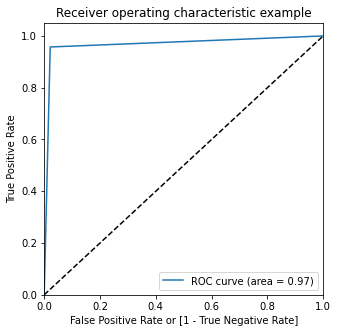

     Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.500740     1.000000     0.001479   0.500370  1.000000
0.1          0.1  0.865693     0.999905     0.731481   0.788305  0.999905
0.2          0.2  0.949266     0.998346     0.900186   0.909108  0.998346
0.3          0.3  0.971408     0.992444     0.950371   0.952375  0.992444
0.4          0.4  0.974494     0.979544     0.969443   0.969749  0.979544
0.5          0.5  0.967900     0.957354     0.978447   0.977982  0.957354
0.6          0.6  0.957681     0.930425     0.984936   0.984068  0.930425
0.7          0.7  0.943253     0.895430     0.991076   0.990133  0.895430
0.8          0.8  0.921167     0.845976     0.996357   0.995713  0.845976
0.9          0.9  0.881440     0.763739     0.999141   0.998877  0.763739


<Figure size 1440x1440 with 0 Axes>

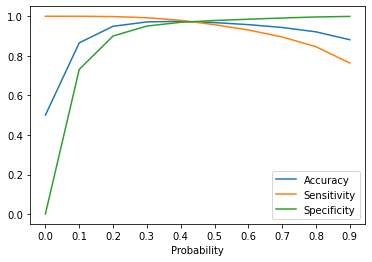

In [126]:
y_pred = rf_best.predict_proba(X_train)
y_pred_final = calculate_y_train_pred(y_pred)
print_score(y_pred_final)
draw_roc(y_pred_final.churn_probability, y_pred_final.Predicted)
print_cutoffmatrix(y_pred_final)

In [127]:
## 0.42 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.42 else 0)
metric_rf_best = print_score(y_pred_final)

Train Result:

accuracy score: 97.3700

Confusion Matrix: 
 [[61107  1760]
 [ 1541 61326]]

Sensitivity: 97.5500

Specificity: 97.2000

False Positive Rate : 2.8000

Positive Predictive Value : 97.2100

Negative Predictive Value : 97.5400

Precision : 97.2100

Recall : 97.5500



In [128]:
y_test_pred = rf_best.predict_proba(X_test)
calculate_y_test_pred_final(y_test_pred,0.42,"rf_best")

3515


In [129]:
#Randome Forest with PCA

In [130]:
rfc_pca = RandomForestClassifier(max_depth=18,
                             max_features=10,
                             min_samples_leaf=10,
                             min_samples_split=20,
                             n_estimators=200,
                             n_jobs = -1)
rfc_pca.fit(df_train_pca,y_train)

RandomForestClassifier(max_depth=18, max_features=10, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=200, n_jobs=-1)

   churn_probability  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0                  0    0.038127          0    1    0    0    0    0    0   
1                  0    0.172423          0    1    1    0    0    0    0   
2                  0    0.038059          0    1    0    0    0    0    0   
3                  0    0.116426          0    1    1    0    0    0    0   
4                  0    0.165698          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0  
Train Result:

accuracy score: 95.1400

Confusion Matrix: 
 [[60917  1950]
 [ 4166 58701]]

Sensitivity: 93.3700

Specificity: 96.9000

False Positive Rate : 3.1000

Positive Predictive Value : 96.7800

Negative Predictive Value : 93.6000

Precision : 96.7800

Recall : 93.3700



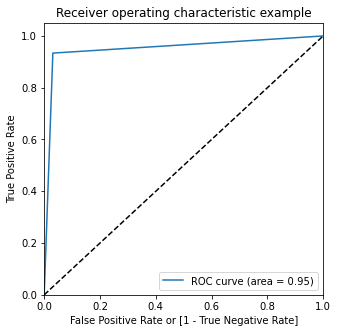

     Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.500000     1.000000     0.000000   0.500000  1.000000
0.1          0.1  0.833466     0.999682     0.667250   0.750269  0.999682
0.2          0.2  0.923139     0.993606     0.852673   0.870871  0.993606
0.3          0.3  0.950626     0.979417     0.921835   0.926091  0.979417
0.4          0.4  0.956026     0.959486     0.952567   0.952892  0.959486
0.5          0.5  0.951358     0.933733     0.968982   0.967849  0.933733
0.6          0.6  0.942720     0.904751     0.980689   0.979102  0.904751
0.7          0.7  0.927744     0.866862     0.988627   0.987050  0.866862
0.8          0.8  0.907018     0.820224     0.993812   0.992513  0.820224
0.9          0.9  0.865589     0.733501     0.997678   0.996844  0.733501


<Figure size 1440x1440 with 0 Axes>

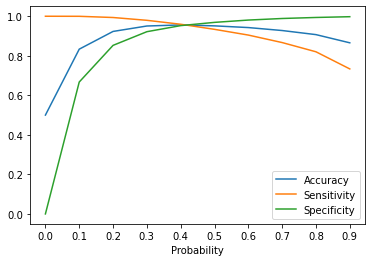

In [131]:
y_pred = rfc_pca.predict_proba(df_train_pca)
y_pred_final = calculate_y_train_pred(y_pred)
print_score(y_pred_final)
draw_roc(y_pred_final.churn_probability, y_pred_final.Predicted)
print_cutoffmatrix(y_pred_final)

In [132]:
## 0.42 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.42 else 0)
metric_rf_pca = print_score(y_pred_final)

Train Result:

accuracy score: 95.5500

Confusion Matrix: 
 [[60123  2744]
 [ 2851 60016]]

Sensitivity: 95.4700

Specificity: 95.6400

False Positive Rate : 4.3600

Positive Predictive Value : 95.6300

Negative Predictive Value : 95.4700

Precision : 95.6300

Recall : 95.4700



In [133]:
y_test_pred = rf_best.predict_proba(X_test)
calculate_y_test_pred_final(y_test_pred,0.42,"rf_pca")

3515


In [134]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['Accuracy Score','Sensitivity','Specifity','False Positive rate',
                       'Positive Predictive value','Negative Predictive Value', 'Precision', 'Recall'], 
        'PCA': metric_pca
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'PCA'] )

pca2_metric = pd.Series(metric_pca2, name = 'PCA Again')
dt_metric = pd.Series(metric_dt, name = 'Decision Tree')
clf_metric = pd.Series(metric_bag_clf, name = 'Bagging classifier')
bag_clf_oob_metric = pd.Series(metric_bag_clf_oob, name = 'Bagging classifier OOB')
xgb_metric = pd.Series(metric_xgb, name = 'XGB')
log_metric = pd.Series(metric_log, name = 'Logistic')
rf_metric = pd.Series(metric_rf, name = 'Random Forest')
rf_best_metric = pd.Series(metric_rf_best, name = 'Random Forest Best')
rf_pca_best_metric = pd.Series(metric_rf_pca, name = 'Random Forest PCA')
final_metric = pd.concat([lr_metric, pca2_metric, dt_metric, clf_metric, 
                          bag_clf_oob_metric, xgb_metric, log_metric, rf_metric,
                          rf_best_metric, rf_pca_best_metric], axis = 1)

final_metric

Metric    PCA  PCA Again  Decision Tree  \
0             Accuracy Score  89.21      89.50          89.07   
1                Sensitivity  89.61      89.86          88.00   
2                  Specifity  88.80      89.15          90.15   
3        False Positive rate  11.20      10.85           9.85   
4  Positive Predictive value  88.89      89.22          89.93   
5  Negative Predictive Value  89.53      89.79          88.25   
6                  Precision  88.89      89.22          89.93   
7                     Recall  89.61      89.86          88.00   

   Bagging classifier  Bagging classifier OOB     XGB  Logistic  \
0               90.58                   90.58   98.05     89.75   
1               89.23                   89.23  100.00     87.69   
2               91.92                   91.92   96.11     91.80   
3                8.08                    8.08    3.89      8.20   
4               91.70                   91.70   96.26     91.45   
5               89.52                   89.52  100.00     88.17   
6               91.70                   91.70   96.26     91.45   
7               89.23                   89.23  100.00     87.69   

   Random Forest  Random Forest Best  Random Forest PCA  
0          96.69               97.37              95.55  
1          96.65               97.55              95.47  
2          96.73               97.20              95.64  
3           3.27                2.80               4.36  
4          96.73               97.21              95.63  
5          96.65               97.54              95.47  
6          96.73               97.21              95.63  
7          96.65               97.55              95.47

### Based on above metrics Random Forest Best is giving best output and got a better score in Kaggle than all other models.

### Summary

- Top 5 Features which help in deriving Churn as per Random Forest
    - local_8
    - std_8
    - total_ic_mou_8
    - last_day_rch_amt_8
    - spl_8

* Any reduction in above values is the prediction customer will likely churn.